# Análisis predictivo de series temporales

## Modelos estadísticos básicos de series temporales

### Definición:

Una *serie temporal* es una sucesión de variables aleatorias o *proceso estocástico* $x_0,x_1,x_2,\ldots$. La variable aleatoria $x_t$ denota el valor del proceso al tiempo $t$.

* Al proceso estocástico o serie temporal se lo denota por $\{x_t\}$.

* Típicamente (y para todo este curso) se consideran indexados por $t$ entero ($\ldots, -2, -1, 0, 1, 2, \ldots$).

* A los valores particulares que toma una serie temporal cuando la observamos se le denomina *realización* del proceso, y lo denotaremos por $x_t$, abusando un poco de la notación.

* Normalmente __graficar__ la evolución de una realización nos da pistas de cómo analizarla.

* A veces las graficaremos como puntos, otras veces como líneas continuas, sobre todo cuando sean la realización de algún proceso continuo subyacente. (por ejemplo, sismógrafo, sonido en la sección anterior). 

* En general series continuas de todos modos se *muestrean* a intervalos discretos, y al analizarlas en un computadora esto es forzosamente así.

* __Observación:__ Elegir el intervalo de muestreo es un arte en sí mismo para capturar la dinámica de la serie.

### Instalación de bibliotecas:

In [1]:
#install.packages("devtools") 
#devtools::install_github("nickpoison/astsa")
#install.packages("astsa")
library(astsa)

##Ajusto tamaño de figuras
options(repr.plot.width=14, repr.plot.height=5, repr.plot.res=300)

### Ejemplo 1: Ruido blanco

**Definición:** El caso más sencillo de serie temporal es un conjunto de variables aleatorias con la misma distribución y no correlacionadas. Si ${w_t}$ es una serie temporal en la cual las variables tienen media $E[w_t]=0$, varianza $Var(w_t) = \sigma_w^2 >0$ y la covarianza de $w_t$ y $w_s$ es $0$ se le denomina *ruido blanco*.  

**Definición:** Si además las variables son independientes y con la misma distribución (iid), se le denomina ruido blanco independiente.

**Definición:** En el caso que además la distribución de $w_t$ para cada $t$ sea Normal $N(0,\sigma_w^2)$ le llamamos *ruido blanco gaussiano*

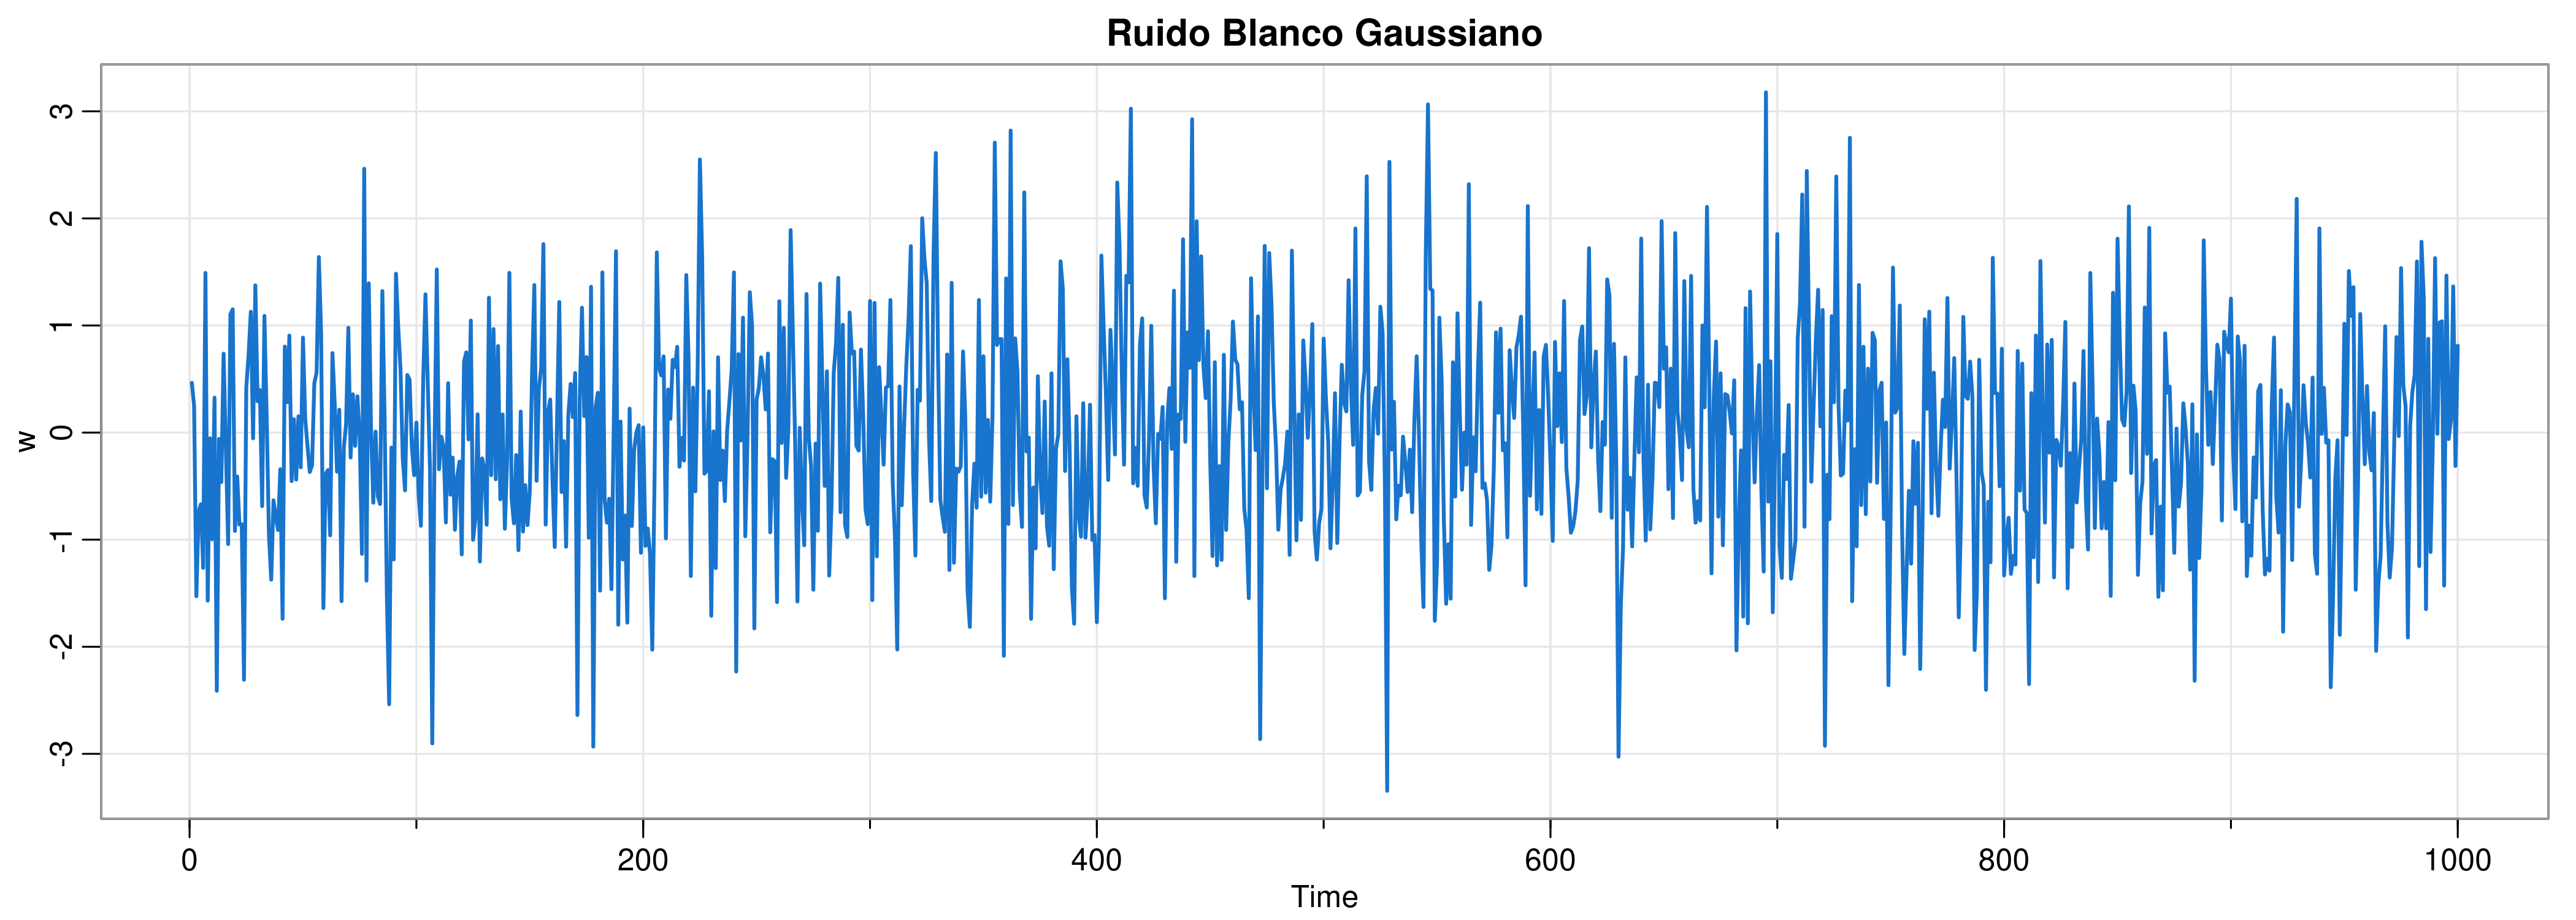

In [2]:
w = rnorm(1000,0,1)  # 1000 N(0,1) variates
tsplot(w, main="Ruido Blanco Gaussiano", lwd=2, col=4)

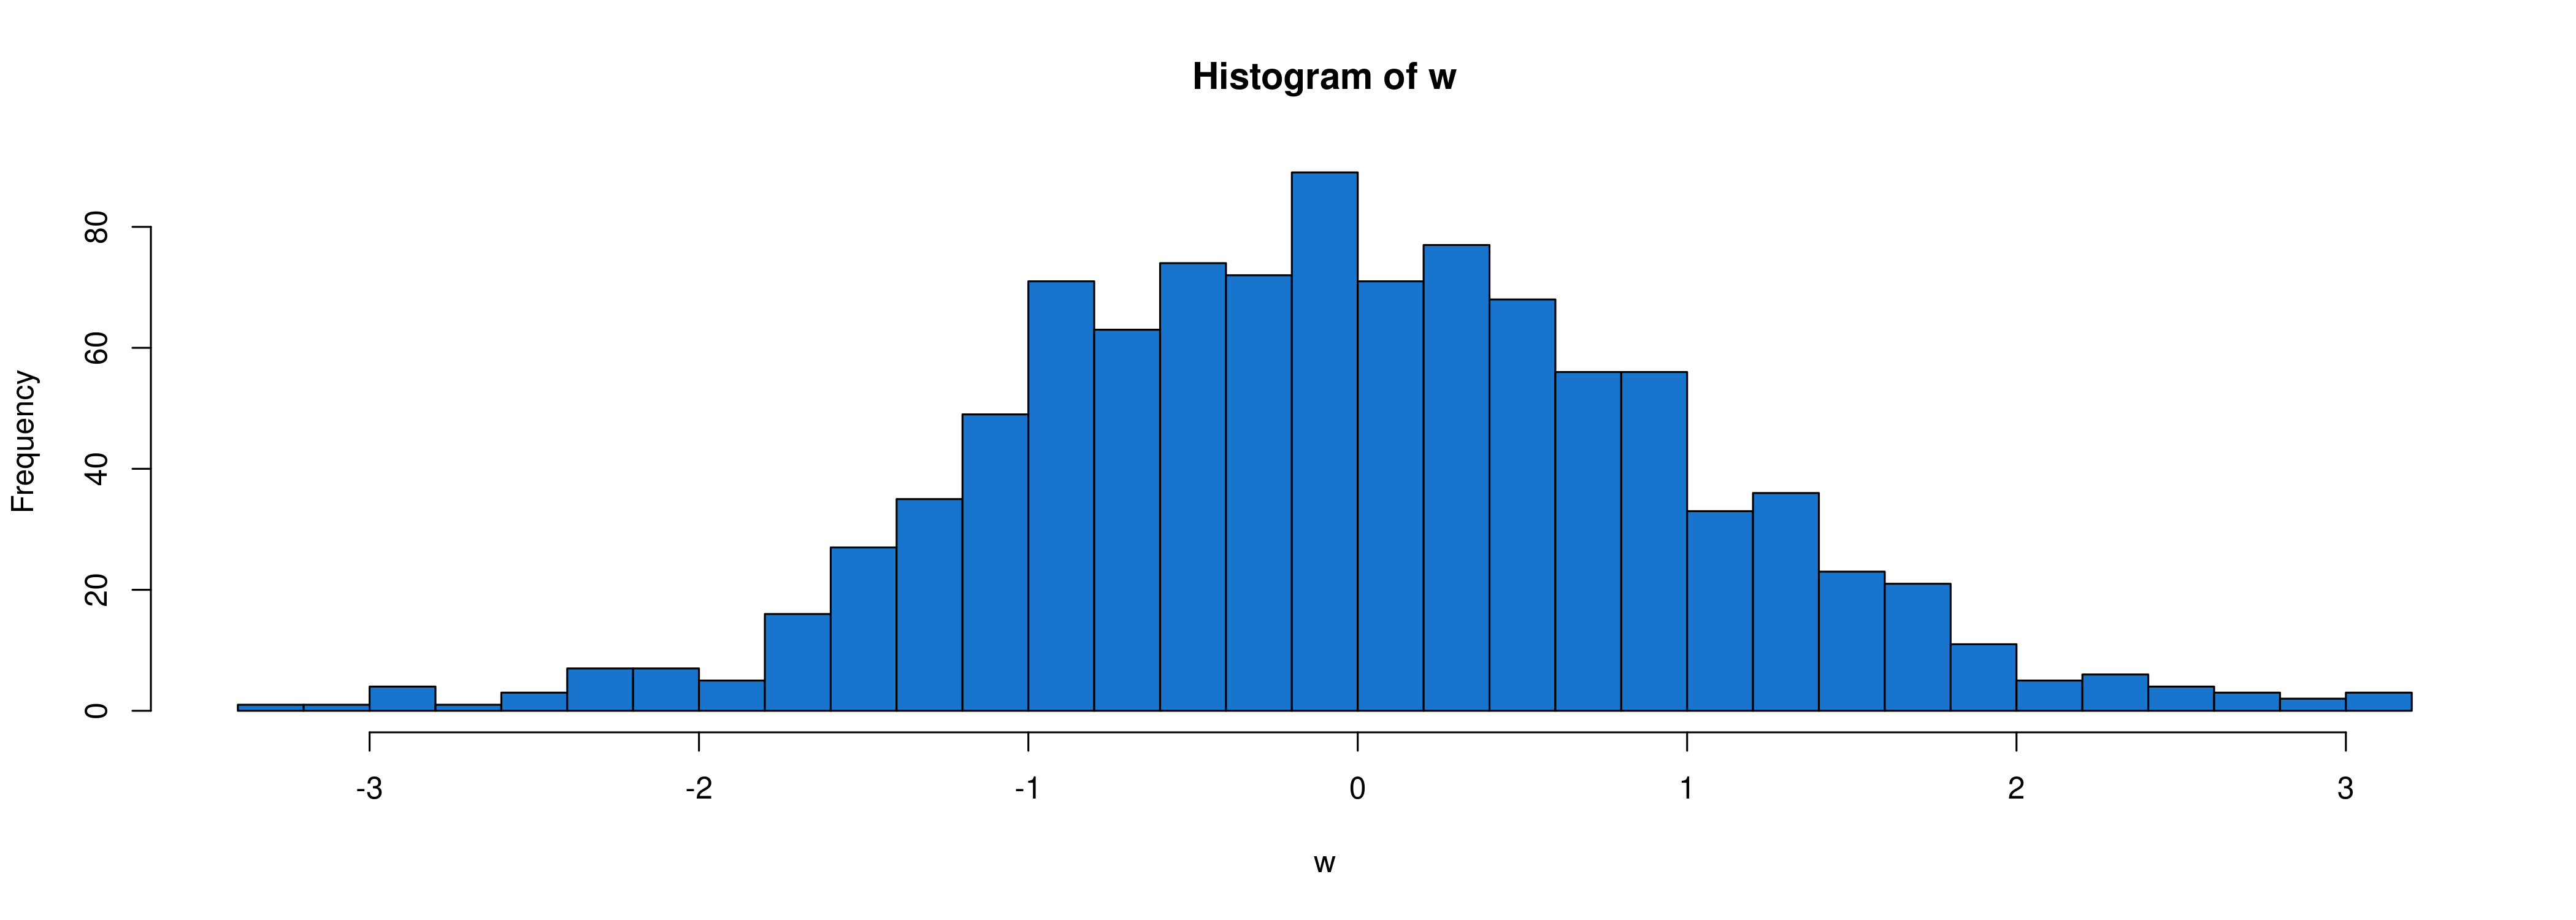

In [3]:
hist(w,30,col=4)

### Ejemplo 2: Media móvil


Considere un proceso de ruido blanco (gaussiano) $w_t$ al que se le aplica el siguiente proceso:

$$ x_t = \frac{1}{3}(w_{t-2} + w_{t-1} + w_{t})$$

Es decir, el valor de $x_t$ es un promedio de los últimos $3$ valores de un ruido blanco. ¿Qué ocurre?

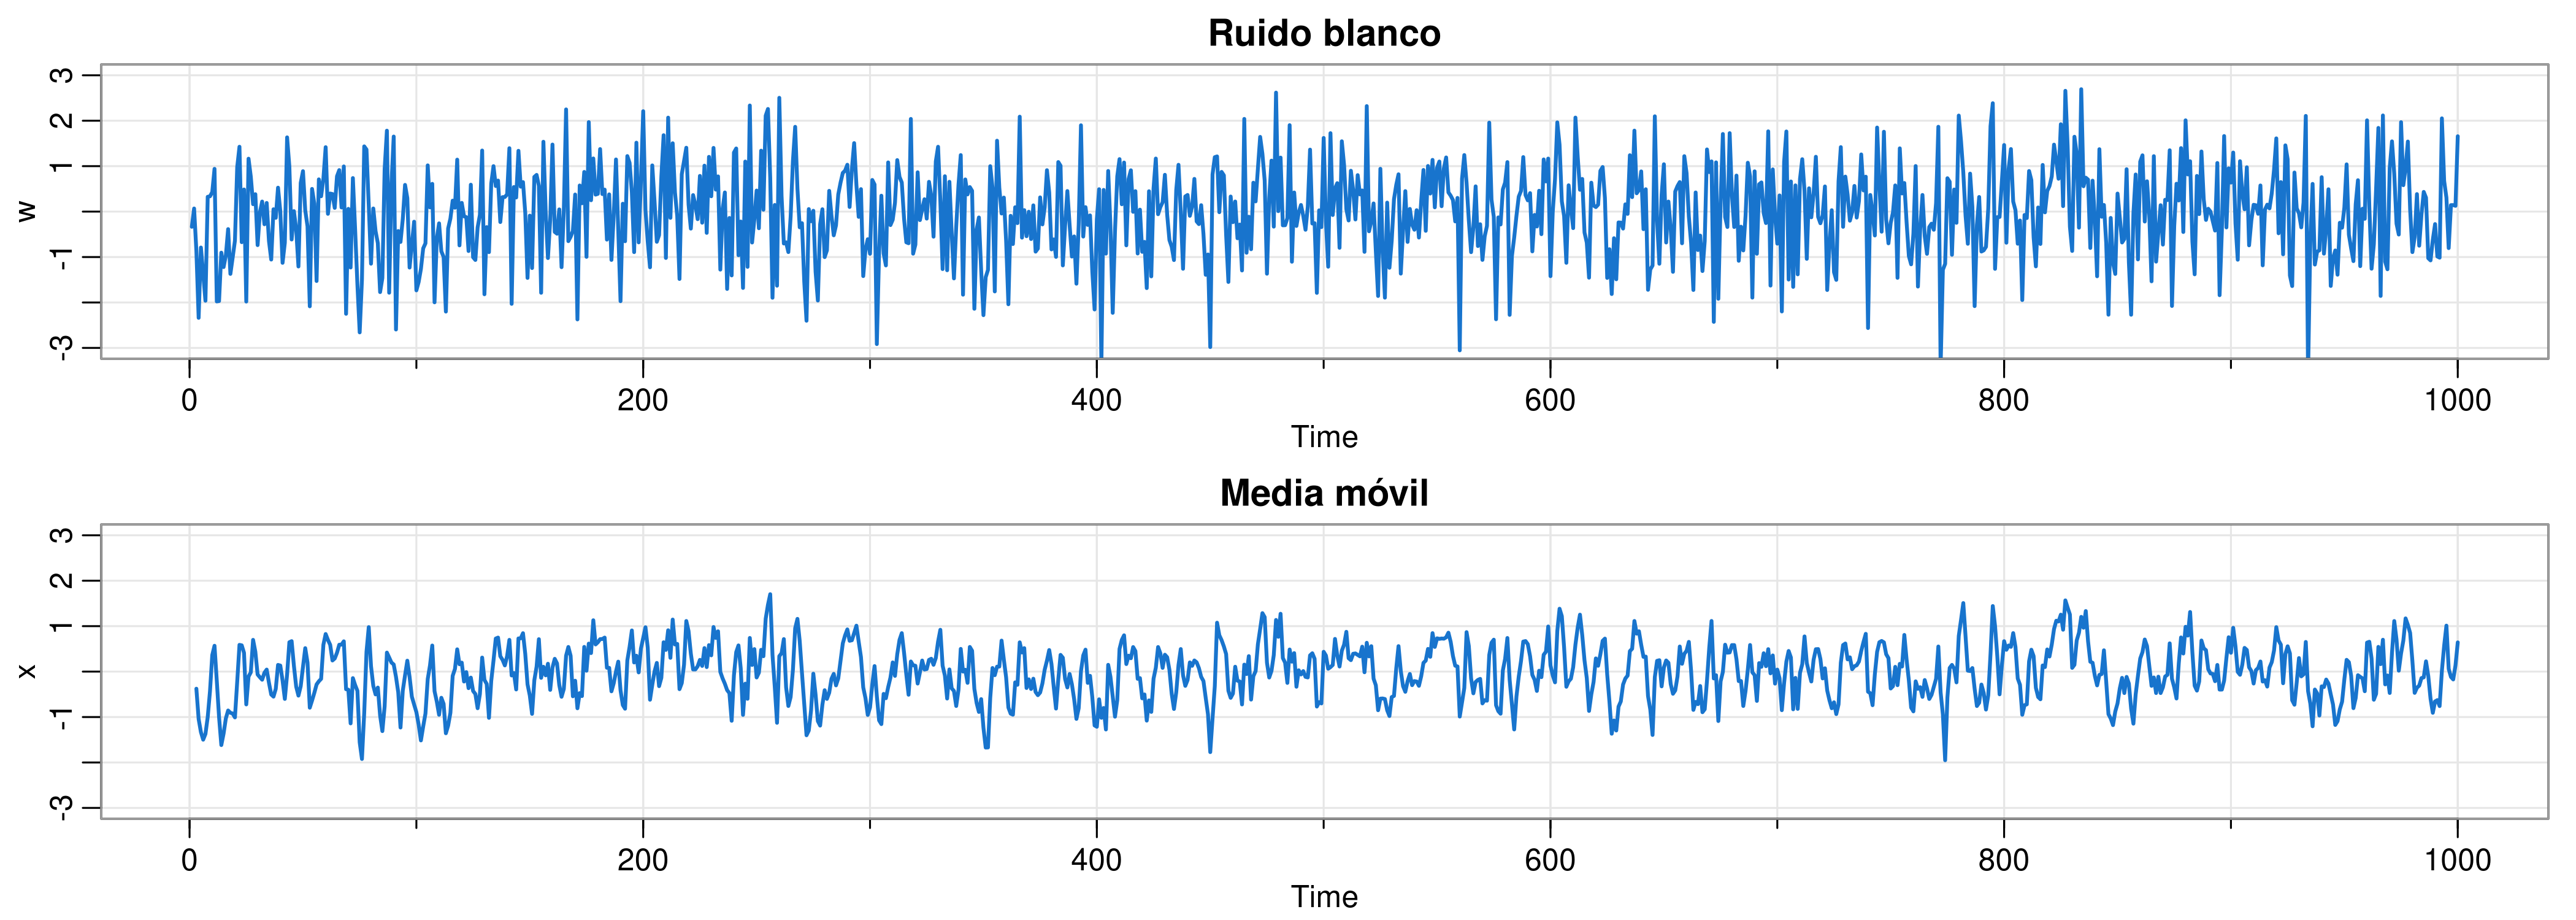

In [4]:
w = rnorm(1000,0,1)  # 1000 N(0,1) variates
x = filter(w, sides=1, rep(1/3,3))  # moving average
par(mfrow=c(2,1))
tsplot(w, ylim=c(-3,3), main="Ruido blanco", col=4, lwd=2)
tsplot(x, ylim=c(-3,3), main="Media móvil", col=4,lwd=2)

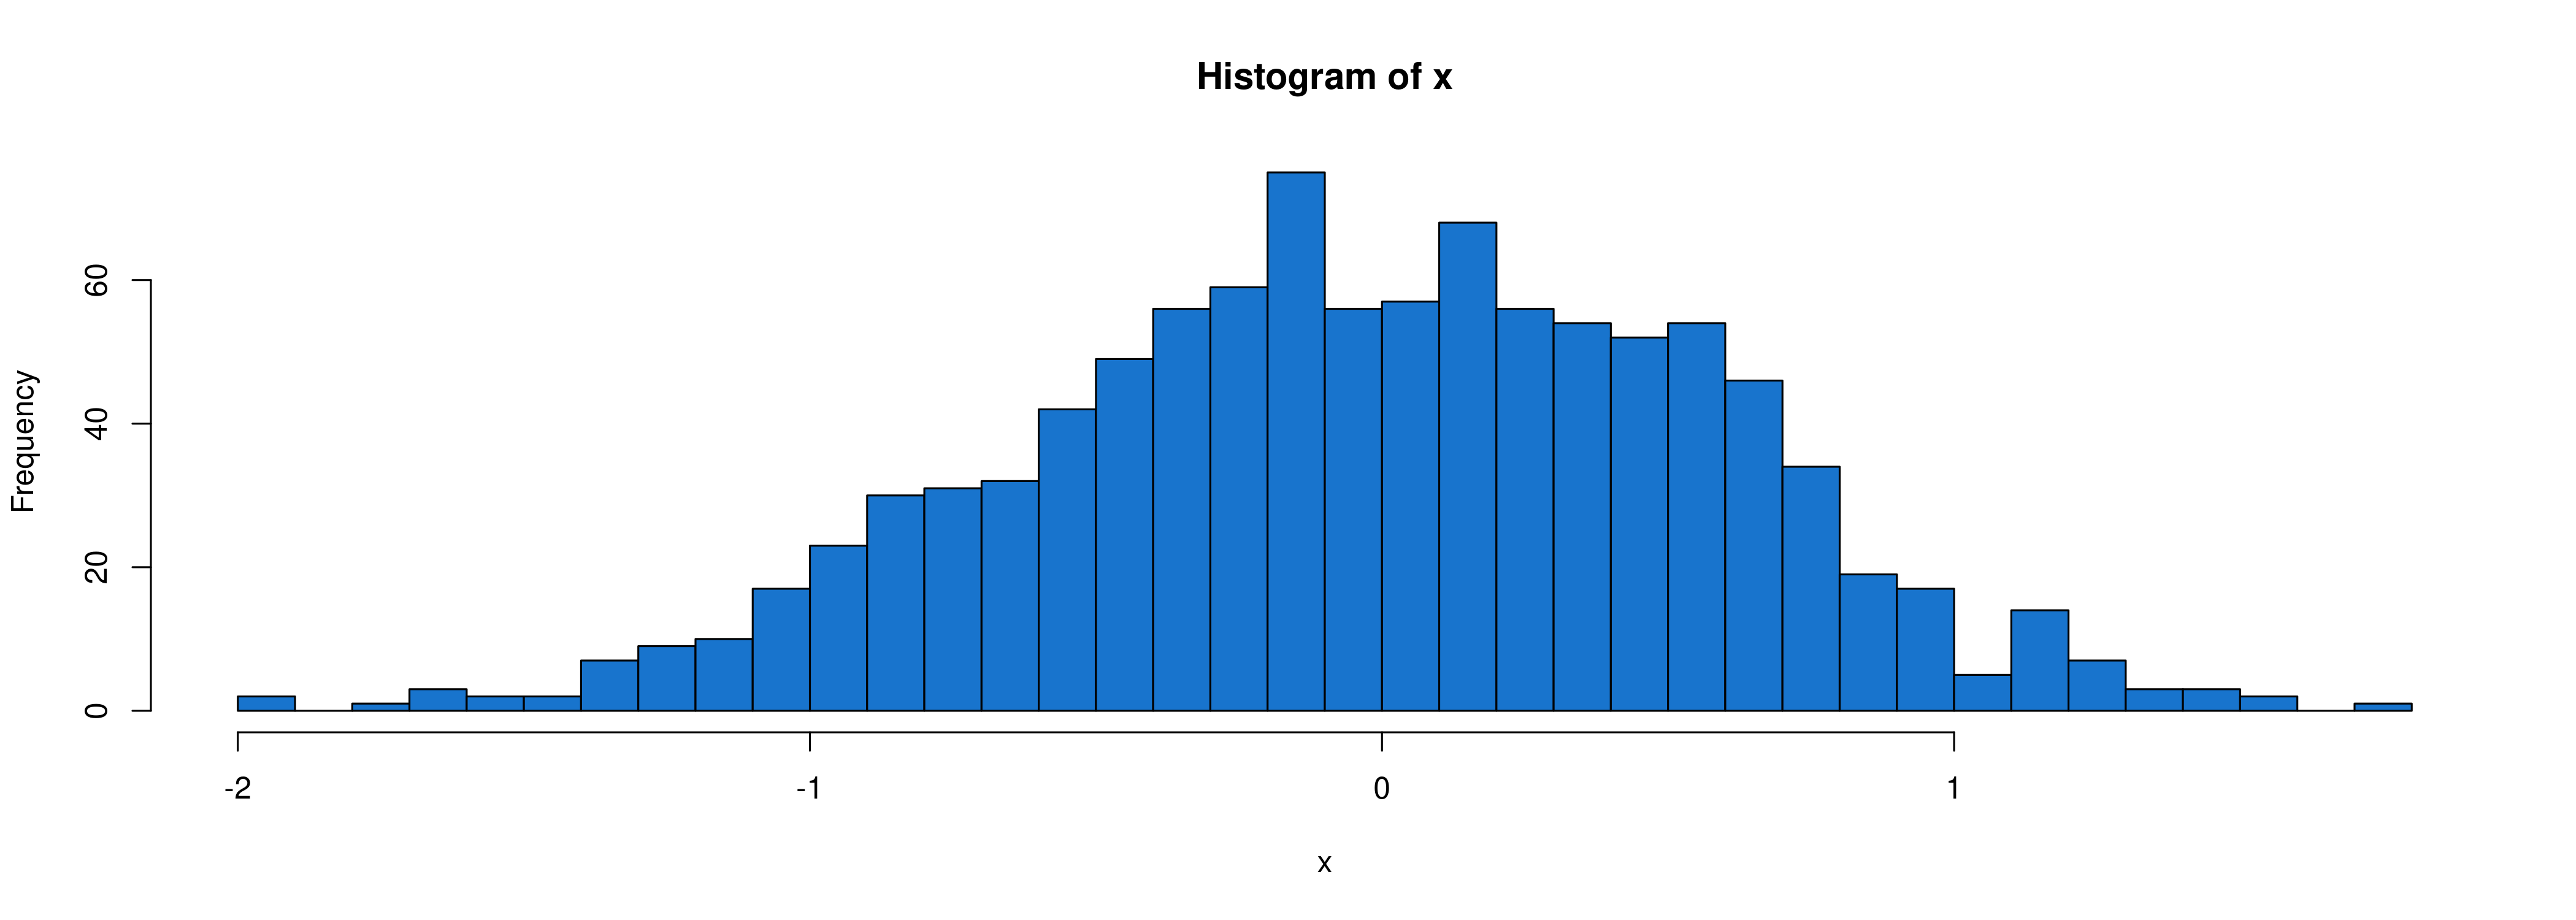

In [5]:
hist(x,30,col=4)

### Observaciones:

* El proceso $x_t$ es más *suave* que el ruido blanco, y tiene menos variabilidad.

* El promediado elimina las oscilaciones más rápidas, y comienzan a realzarse las lentas.

* Al proceso de tomar ruido blanco (o cualquier señal) y aplicarle una transformación lineal como la anterior se le llama *media móvil* o *filtrado*. De ahí el comando `filter` que se utiliza.

### Media móvil con coeficientes arbitrarios

Lo anterior se puede realizar con coeficientes cualesquiera, cambiando así la estructura del proceso.

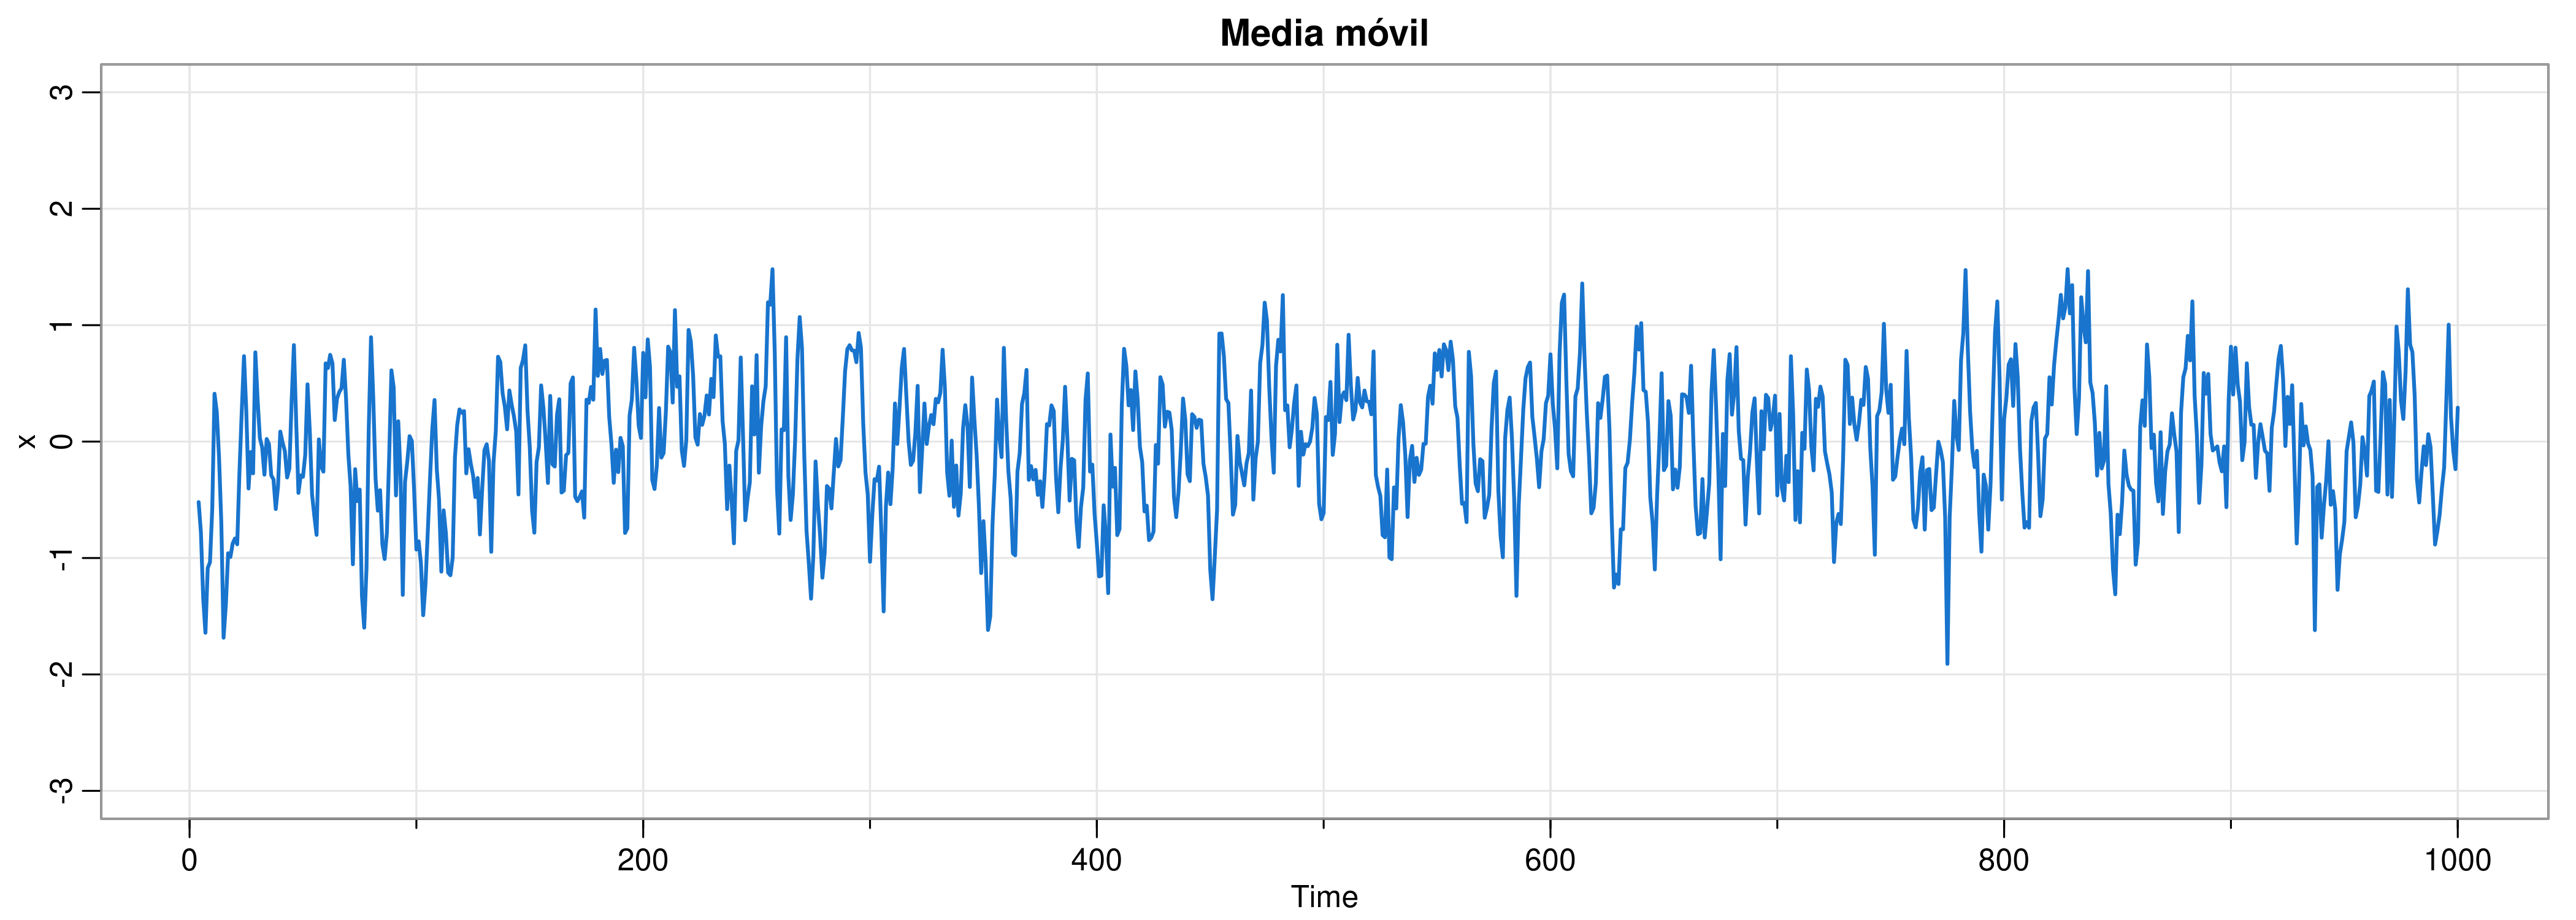

In [6]:
x = filter(w, sides=1, c(0.1,0.2,0.3,0.4))  # moving average
tsplot(x, ylim=c(-3,3), main="Media móvil", col=4,lwd=2)

### Ejemplo 3: Autorregresiones

Consideremos una serie $x_t$ donde el valor actual *depende explícitamente* de los valores anteriores ponderados, más un término de ruido o *innovación* independiente que ocurre en tiempo $t$.

Más explícitamente, $x_t$ se genera por ejemplo mediante la siguiente ecuación:

$$x_t = 0.9 x_{t-1} + w_t$$

A este proceso se le denomina *autorregresivo* de orden $1$.

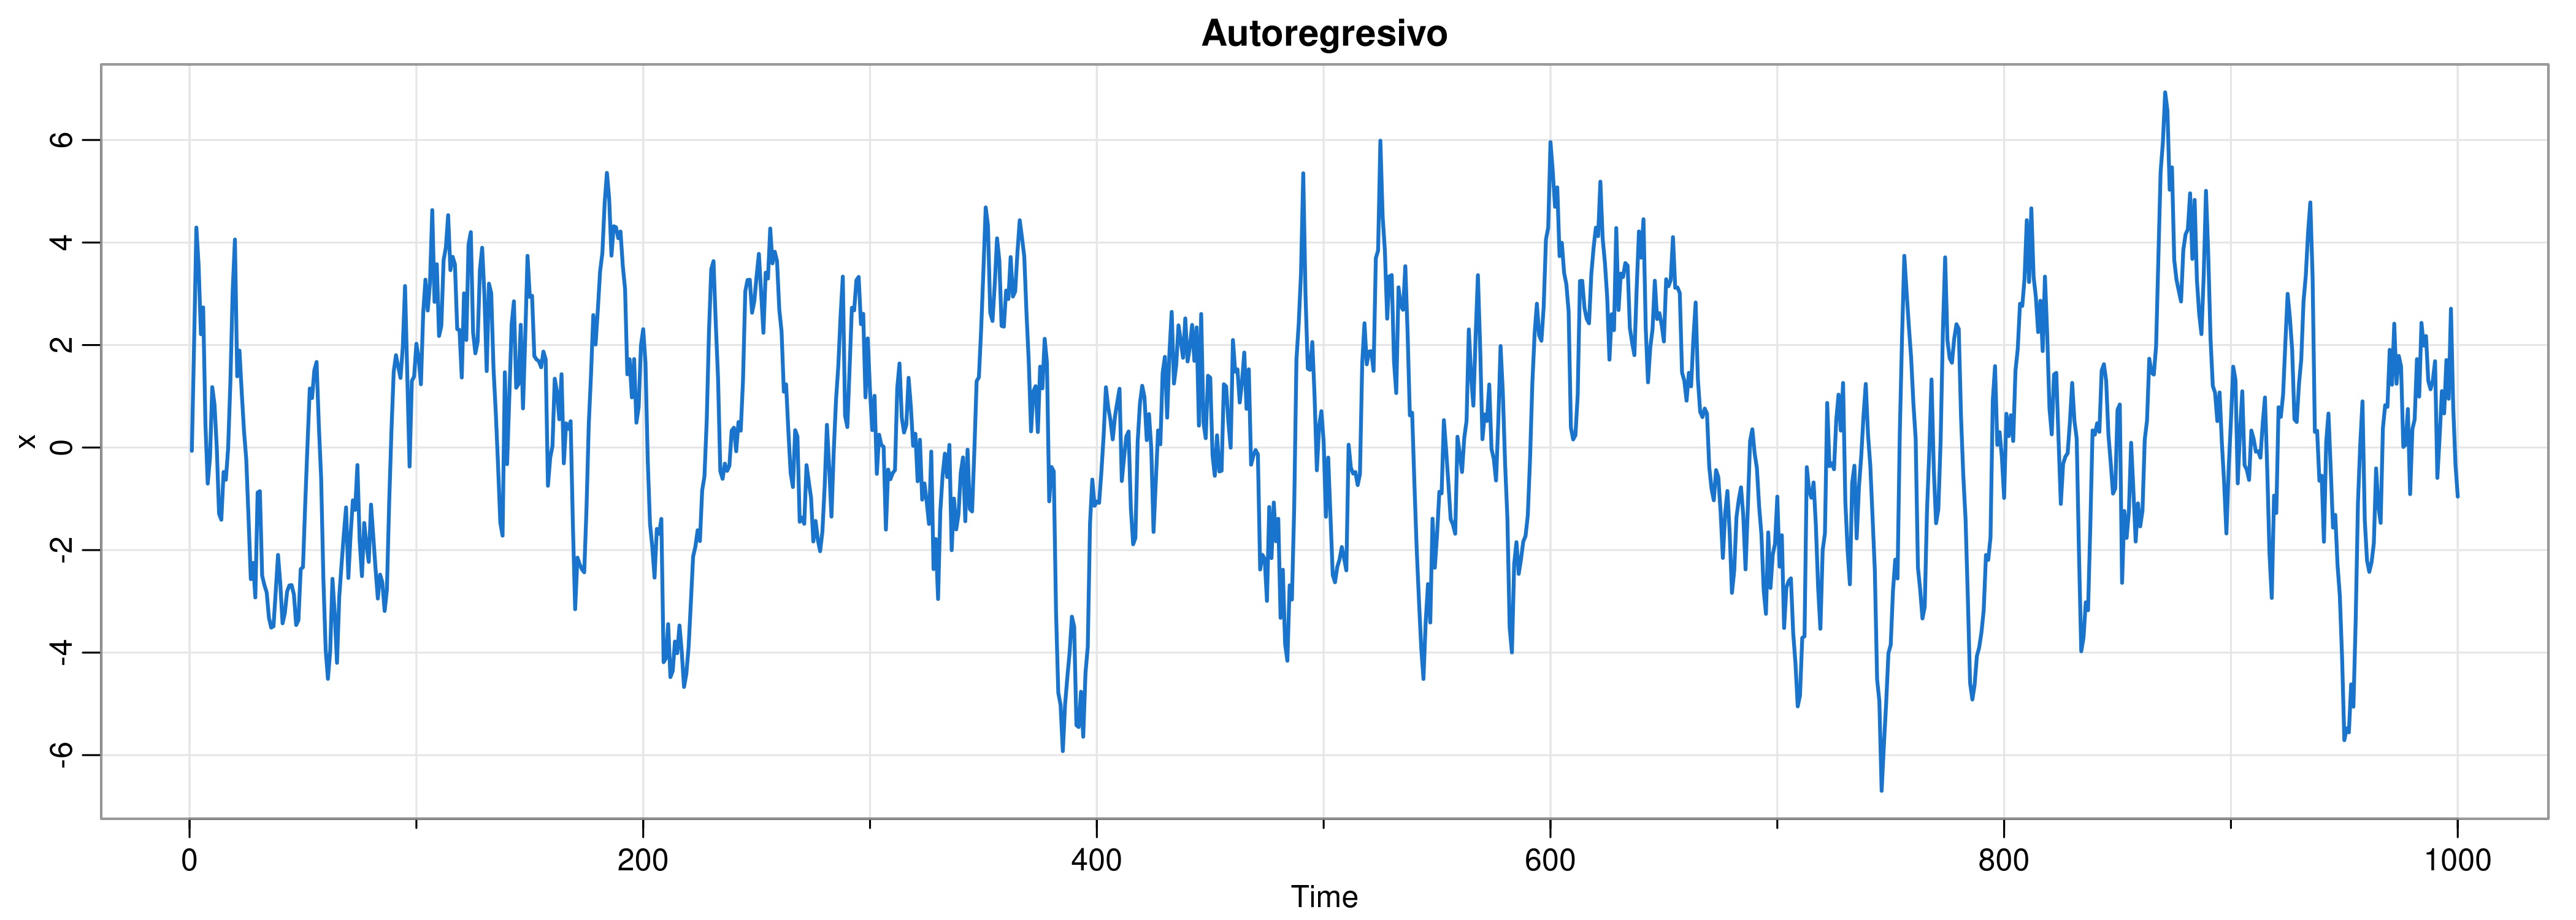

In [7]:
w = rnorm(1000,0,1)
x = filter(w, filter=c(.9), method="recursive") #recursivo aplica el filtro sobre los propios valores.
tsplot(x, main="Autoregresivo", lwd=2, col=4)

### Observaciones:

* El proceso $x_t$ presenta *inercia*, producto de la dependencia con los anteriores.

* Observemos que tenemos que definir las condiciones iniciales para la serie ($x_0$ y $x_{-1}$).

* También puede generarse usando el comando `filter` y el método `recursive`.

### Autorregresiones en general

El procedimiento anterior permite generar procesos sumamente ricos en su estructura. A mode de ejemplo, consideremos una serie $x_t$ que se genera a partir de ruido blanco $w_t$ mediante la siguiente ecuación:

$$ x_t = x_{t-1} - 0.9 x_{t-2} + w_t.$$

Este es un ejemplo de proceso *autorregresivo* de orden $2$.

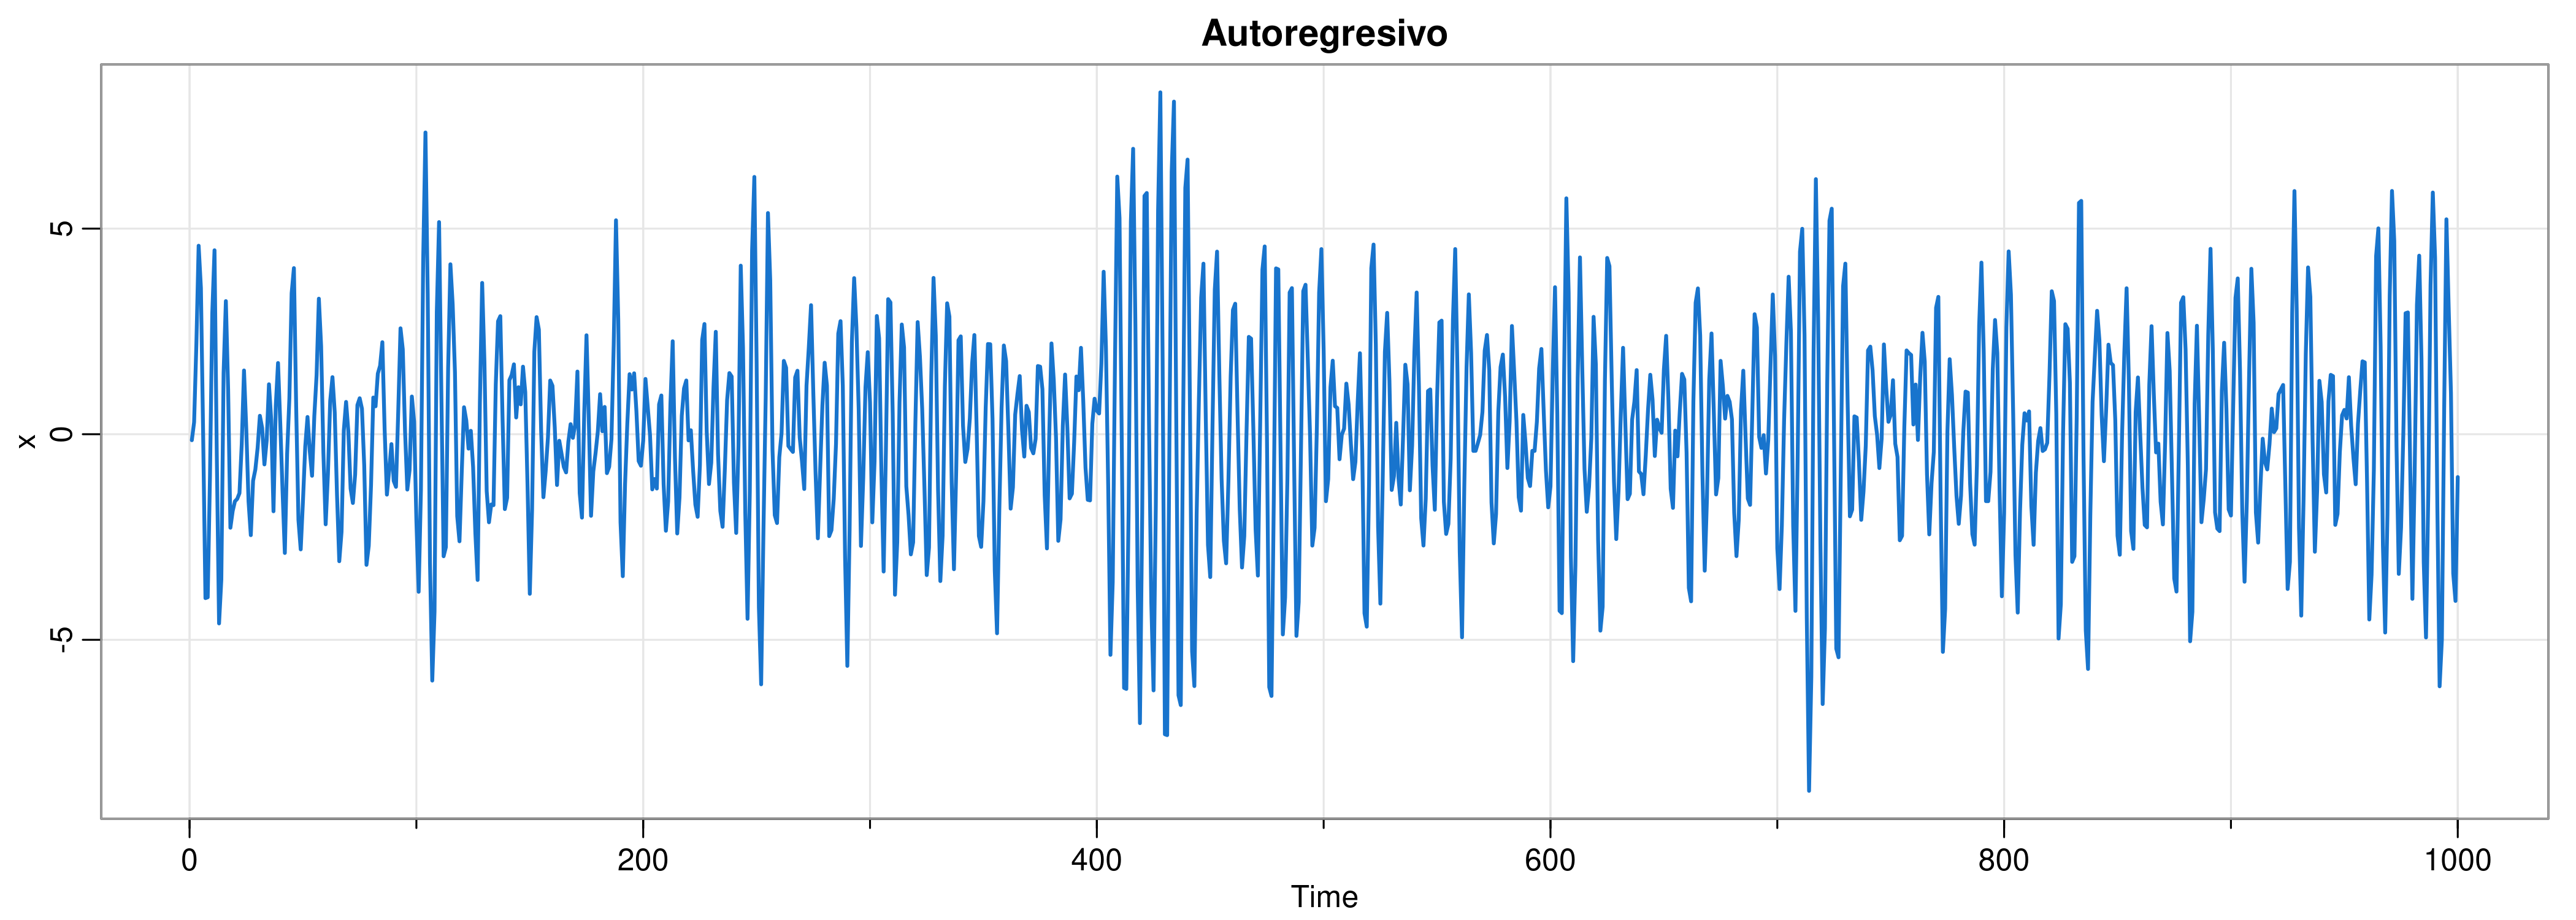

In [8]:
w = rnorm(1000,0,1)
x = filter(w, filter=c(1,-.9), method="recursive")
tsplot(x, main="Autoregresivo", lwd=2, col=4)

### Observaciones:

* En este caso, el proceso $x_t$ presenta *oscilaciones*, producto de la estructura de dependencia con los valores anteriores.

* Pruebe cambiar los coeficientes para ver los posibles comportamientos.

### Ejemplo 4: Paseo al azar con deriva.

Consideremos una señal $x_t$ que se genera a partir de ruido blanco $w_t$ mediante la siguiente ecuación:

$$ x_t = \delta + x_{t-1} + w_t.$$

Es un paseo al azar con deriva: $\delta$ es la magnitud de la deriva. Observemos que el proceso va acumulando los ruidos anteriores. 

$$ x_t = \delta + x_{t-1} + w_t = \delta + (\delta + x_{t-2}+w_{t-1}) + w_t = 2\delta + w_{t-1} + w_t$$

y así sucesivamente.

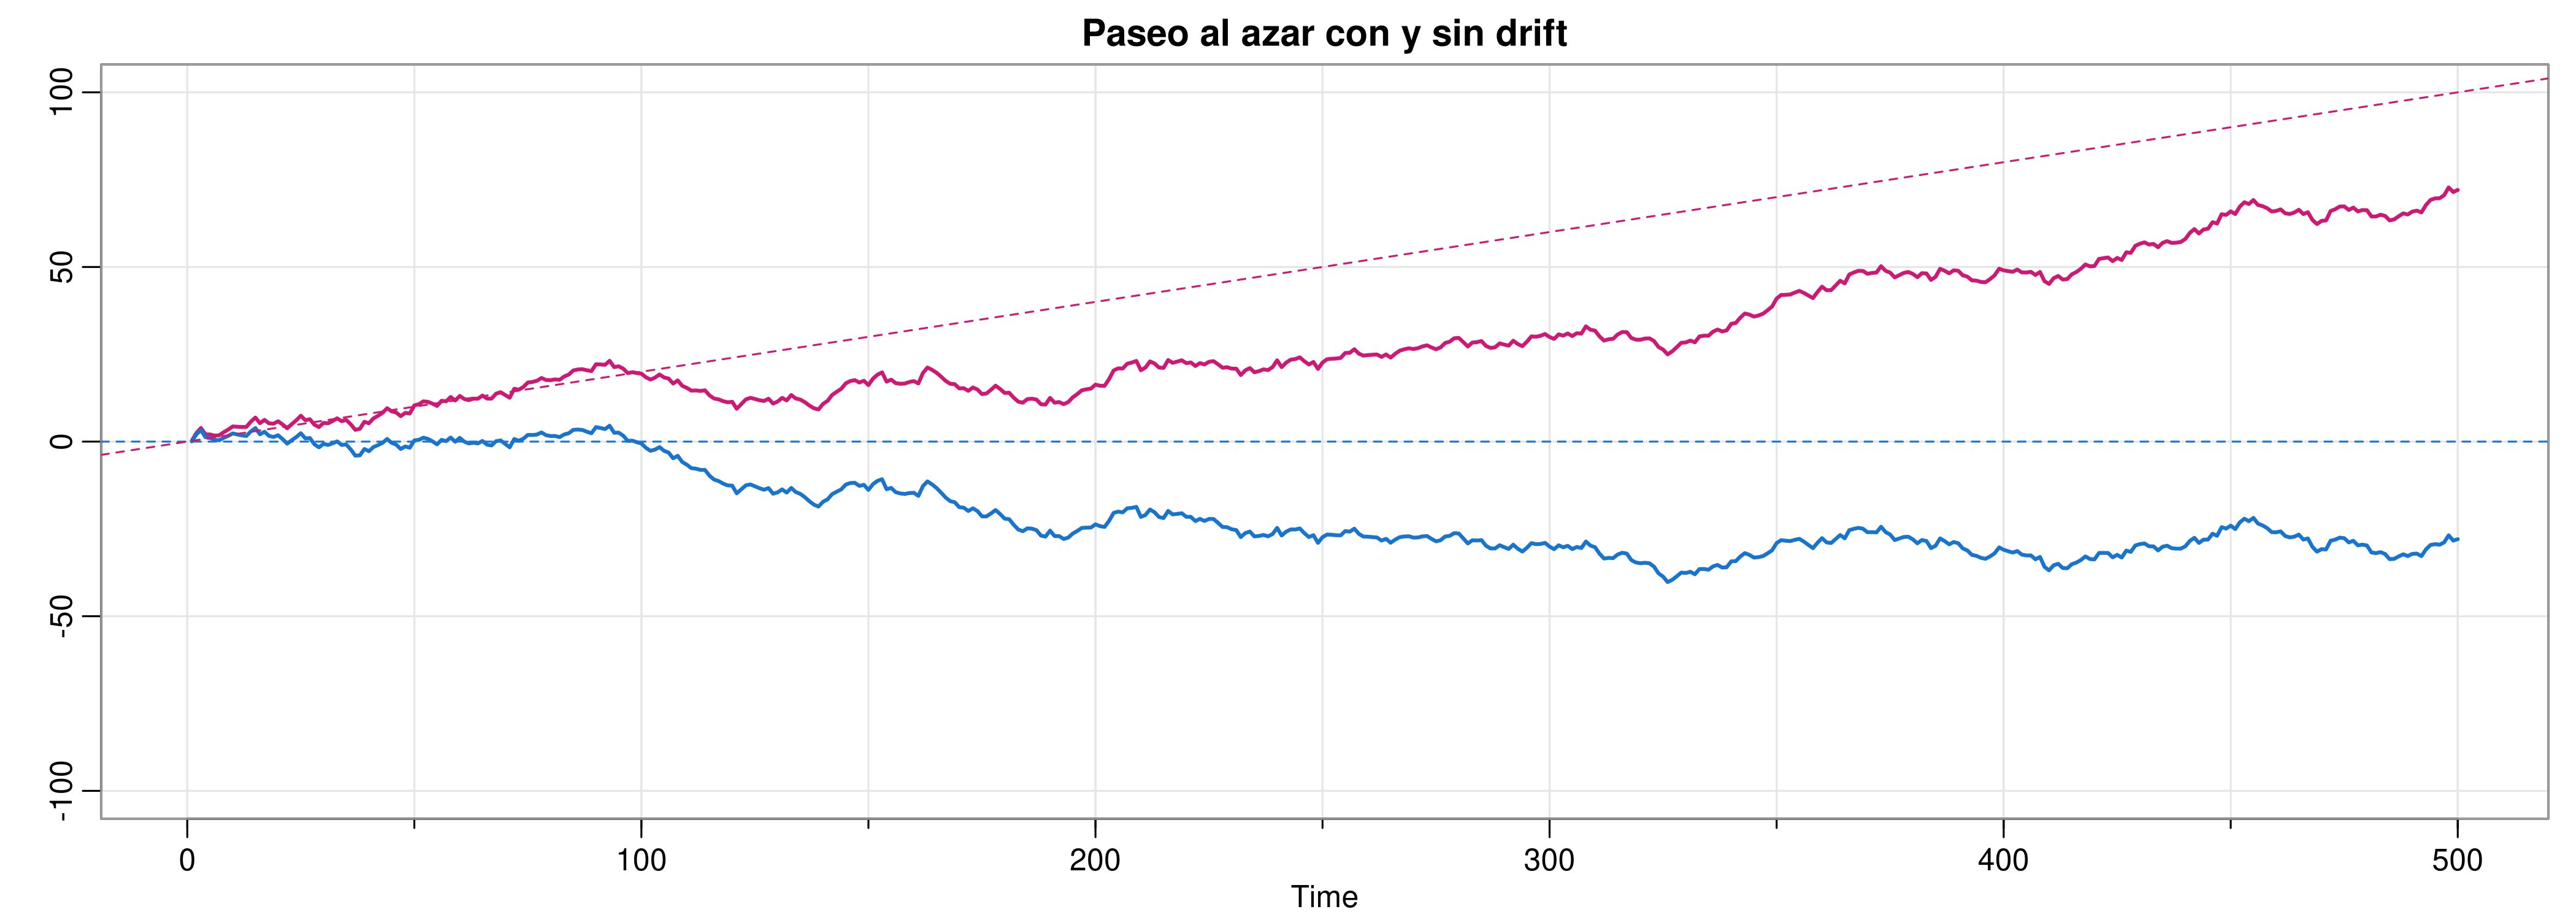

In [9]:
w = rnorm(500,0,1)  #Genero la serie w
x = cumsum(w)   #Al acumular w obtengo x para delta=0

delta = 0.2
wd = w + delta  #Ahora sumo delta en cada paso
xd = cumsum(wd) #y acumulo

tsplot(xd, ylim=c(-100,100), main="Paseo al azar con y sin drift", ylab='', lwd=2, col=6)
lines(x, lwd=2, col=4) 
abline(h=0, col=4, lty=2)
abline(a=0, b=delta, lty=2, col=6)

### Observaciones:

El proceso no es estacionario!

 * Si la deriva es distinta de 0, esto es obvio. El valor medio de la señal va creciendo (o decreciendo) indefinidamente.
 
 * Si la deriva es 0, de todos modos la varianza va aumentando a medida que acumulamos más y más instancias del ruido.
 
 * Para ver esto último, simulemos varias realizaciones del proceso.
 

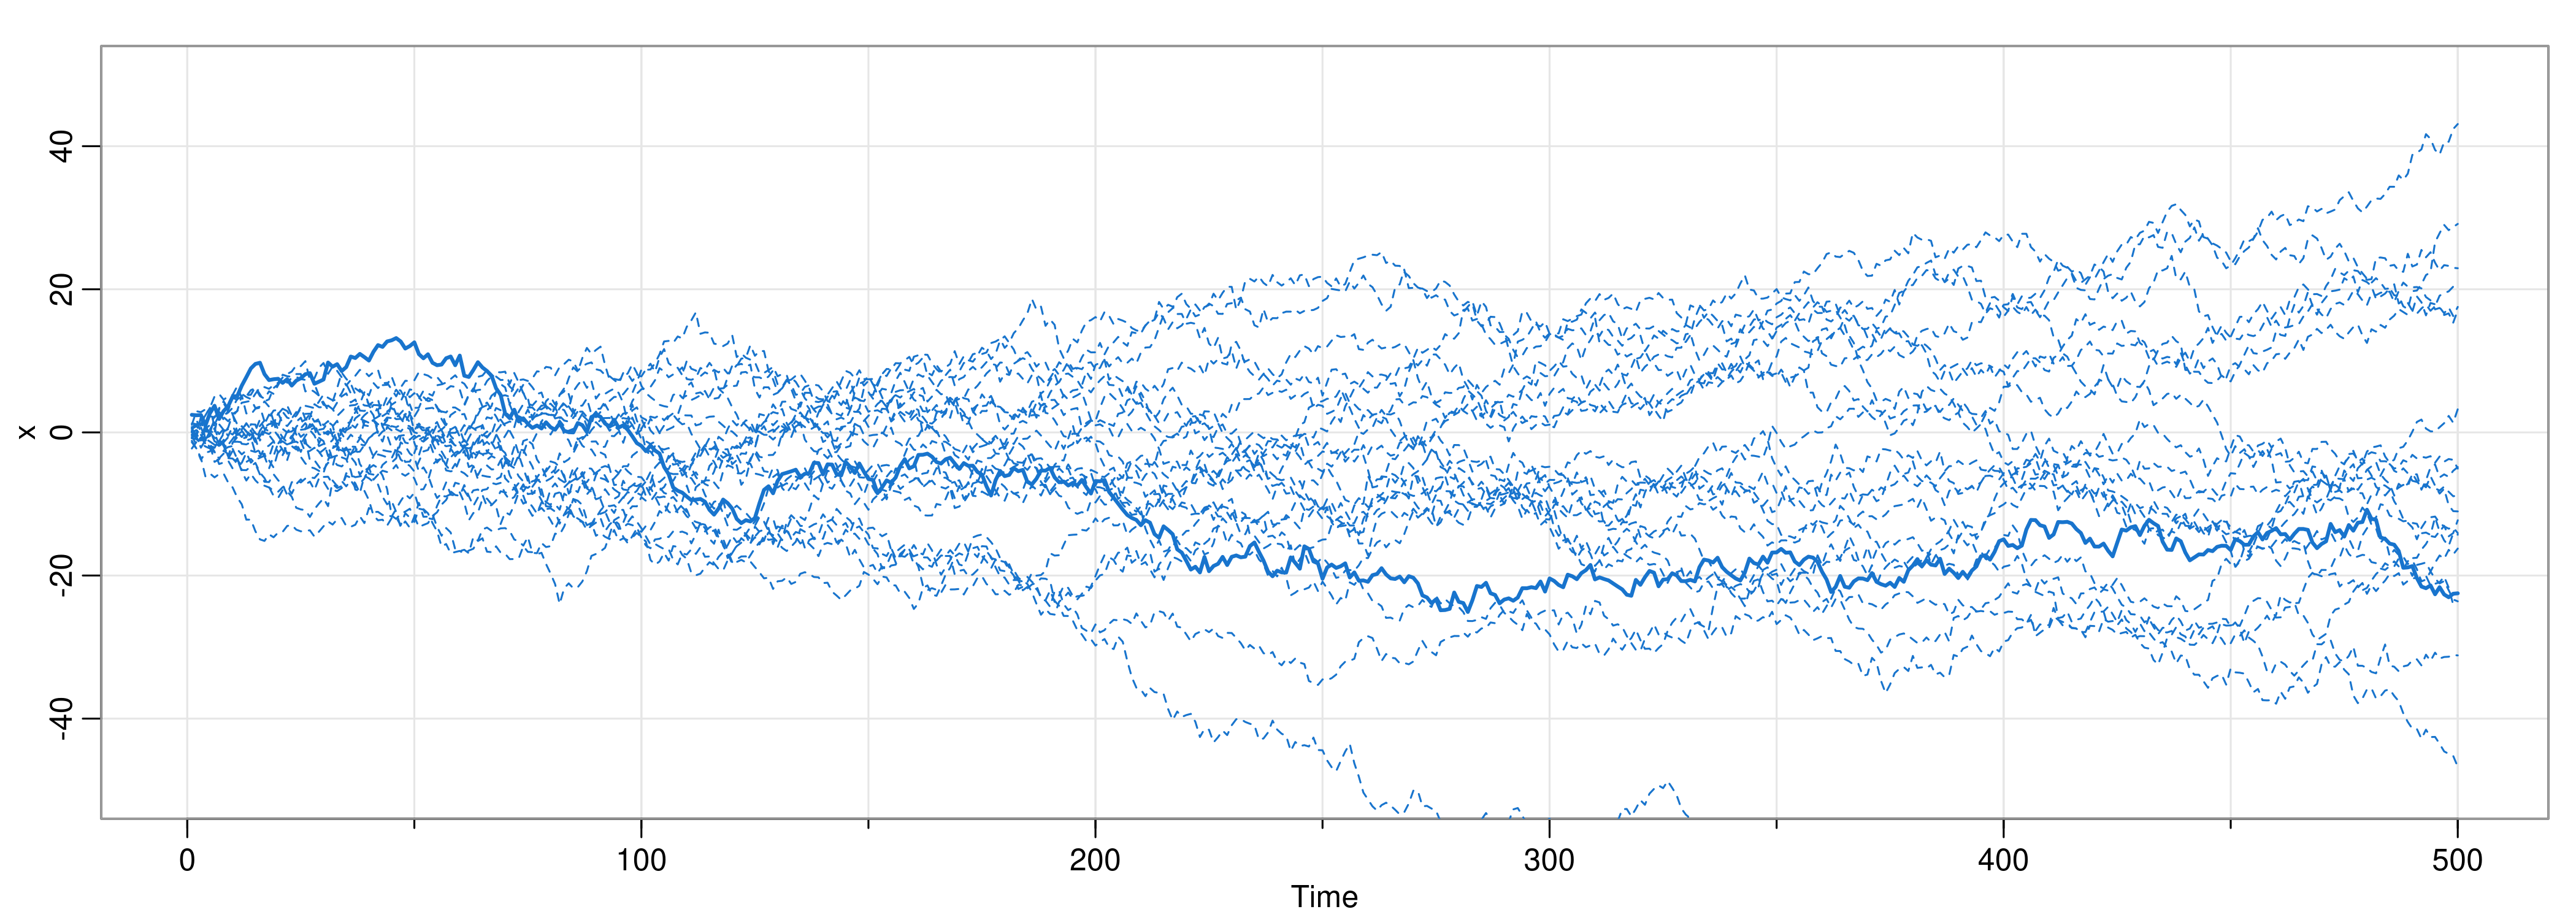

In [10]:
w = rnorm(500,0,1)
x = cumsum(w)

tsplot(x,lwd=2,col=4, ylim=c(-50,50))

for (i in 1:20) {
    w = rnorm(500,0,1)
    x = cumsum(w)
    lines(x,lty=2,col=4)
}

### Incrementos de un paseo al azar

Si consideramos los *incrementos* del proceso, estos sí son estacionarios:

$$y_t = x_t - x_{t-1} = \delta + x_{t-1} + w_t - x_{t-1} = \delta + w_t$$

Es decir, si aplicamos la transformación $x_t \mapsto y_t = x_t - x_{t-1} = \nabla x_t$, obtenemos ruido blanco (más una media $\delta$ que marca la tendencia).

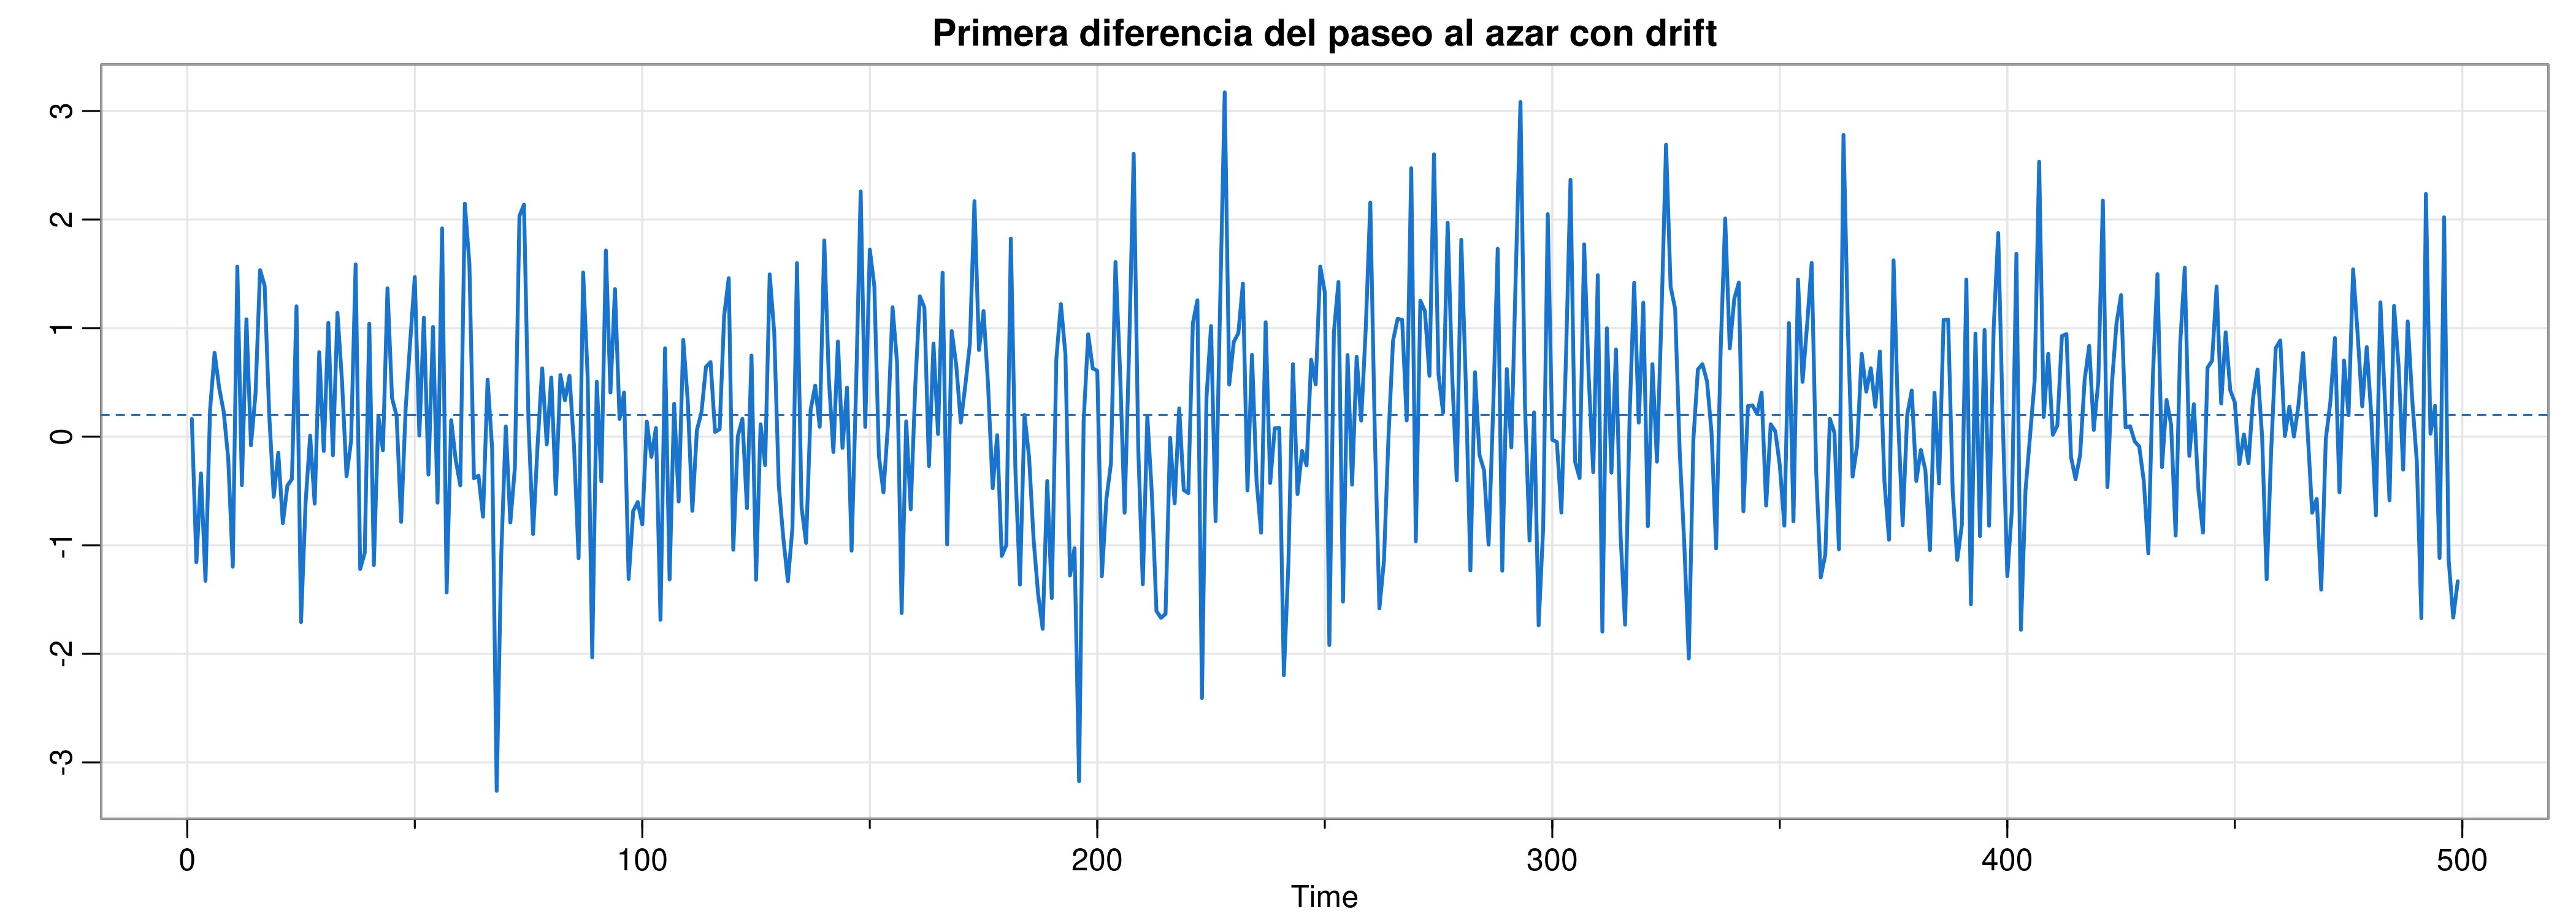

In [11]:
w = rnorm(500,0,1)  #Genero la serie w
x = cumsum(delta + w)   #Al acumular delta+w obtengo x
y = diff(x)  #el comando diff aplica la transformación

tsplot(y, main="Primera diferencia del paseo al azar con drift", ylab='', lwd=2, col=4)
abline(h=delta, col=4, lty=2)

### Ejemplo 5: Señal y ruido

Se tiene la señal:

$$ x_t = s_t + w_t$$

Siendo $s_t$ la siguiente:

$$s_t = 2\cos\left(2\pi\frac{t+15}{50}\right).$$

Aquí:

 * El $2$ multiplicando representa la *amplitud* de la señal.
 * El $1/50$ dentro del coseno es la *frecuencia*. En este caso, lleva 50 unidades de tiempo completar un ciclo.
 * El $15$ indica la *fase*, es decir, dónde se encuentran los picos. Como $\cos(2\pi n) = 1$, esta señal tendría un pico en $t=-15$ ($\cos(0)$) y luego cada $50$ unidades, por lo que el primer pico visible está en $t=35$ ($\cos(2\pi)$).

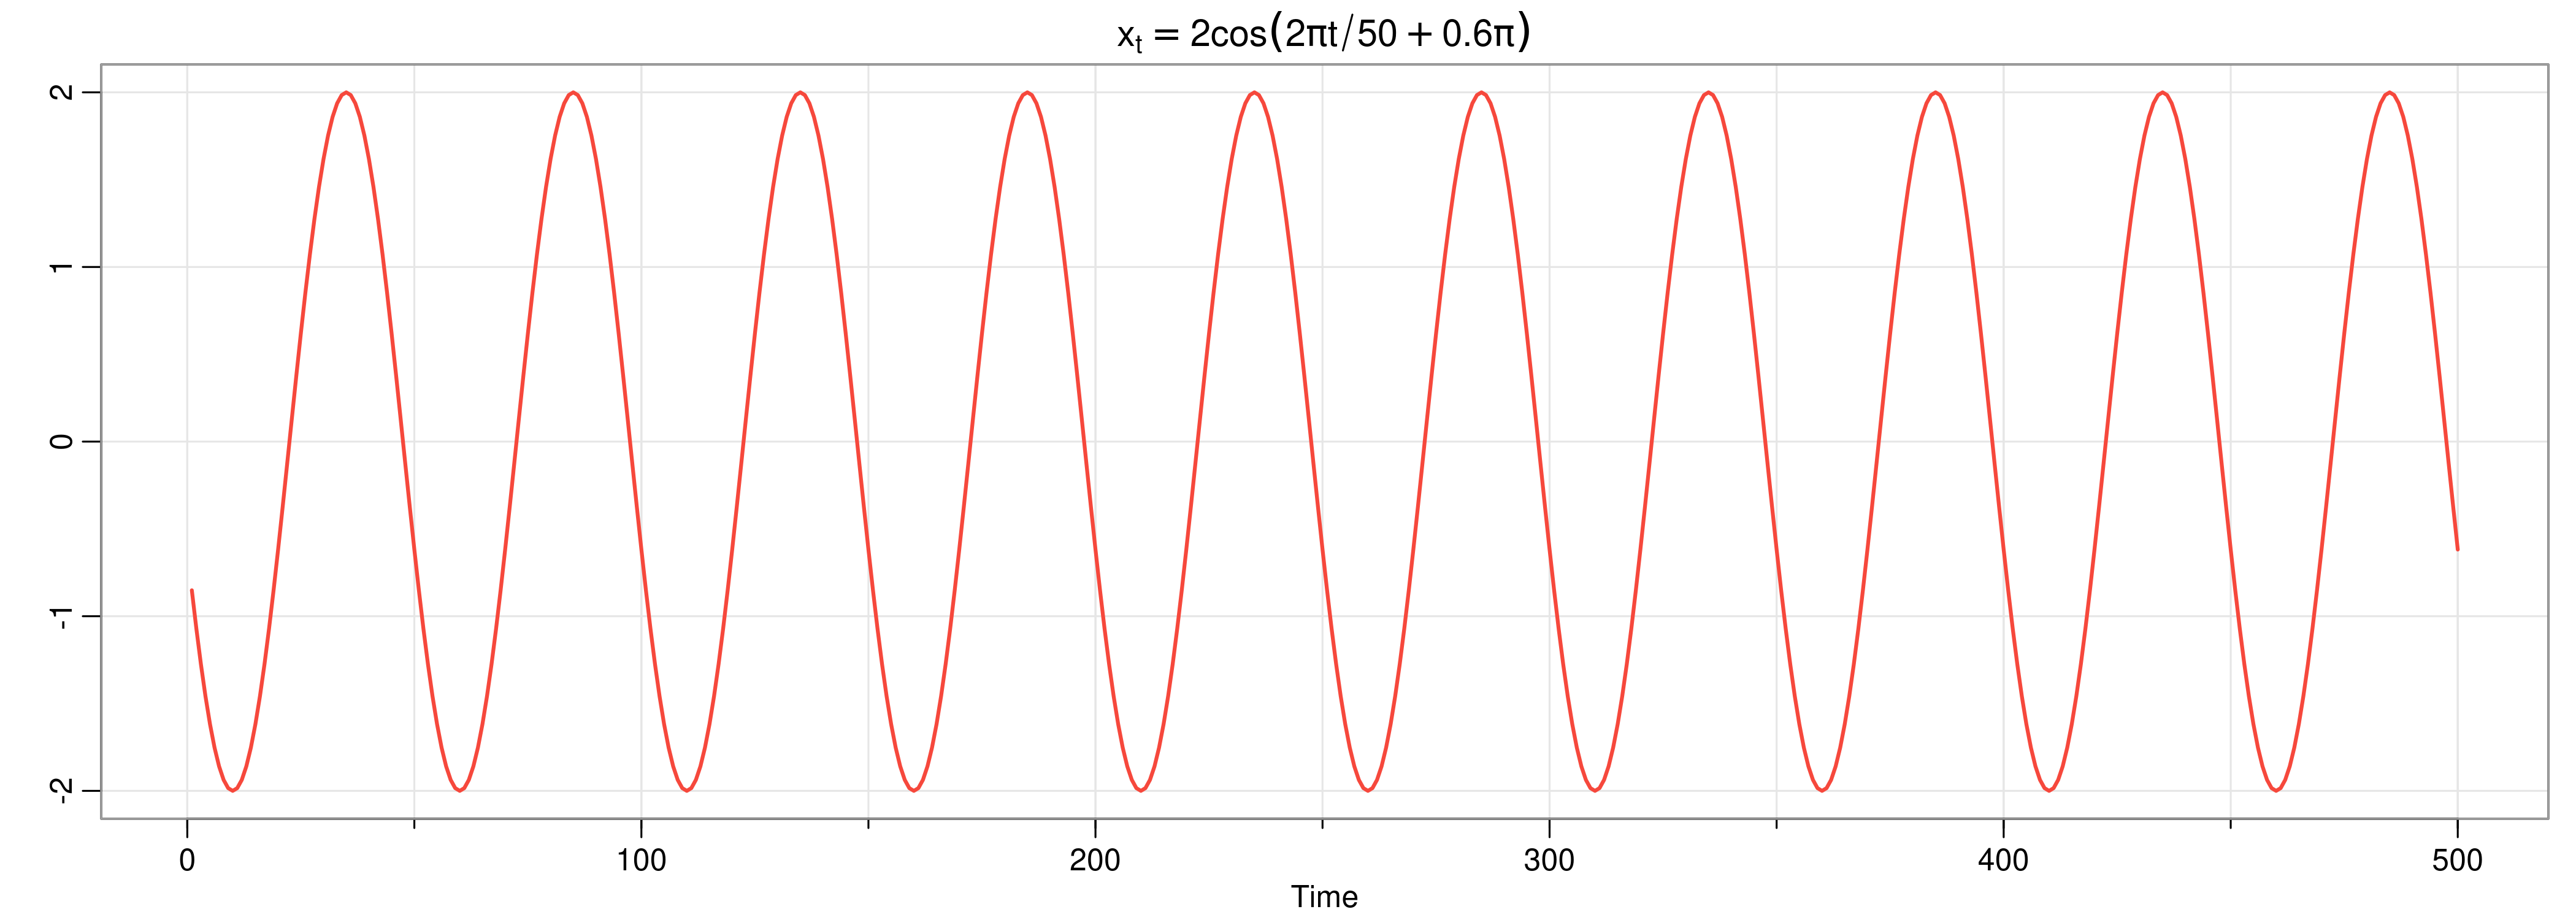

In [12]:
t = (1:500)
s = 2*cos(2*pi*(t+15)/50)
tsplot(s, ylab="", main = expression(x[t]==2*cos(2*pi*t/50+.6*pi)), lwd=2, col=2)

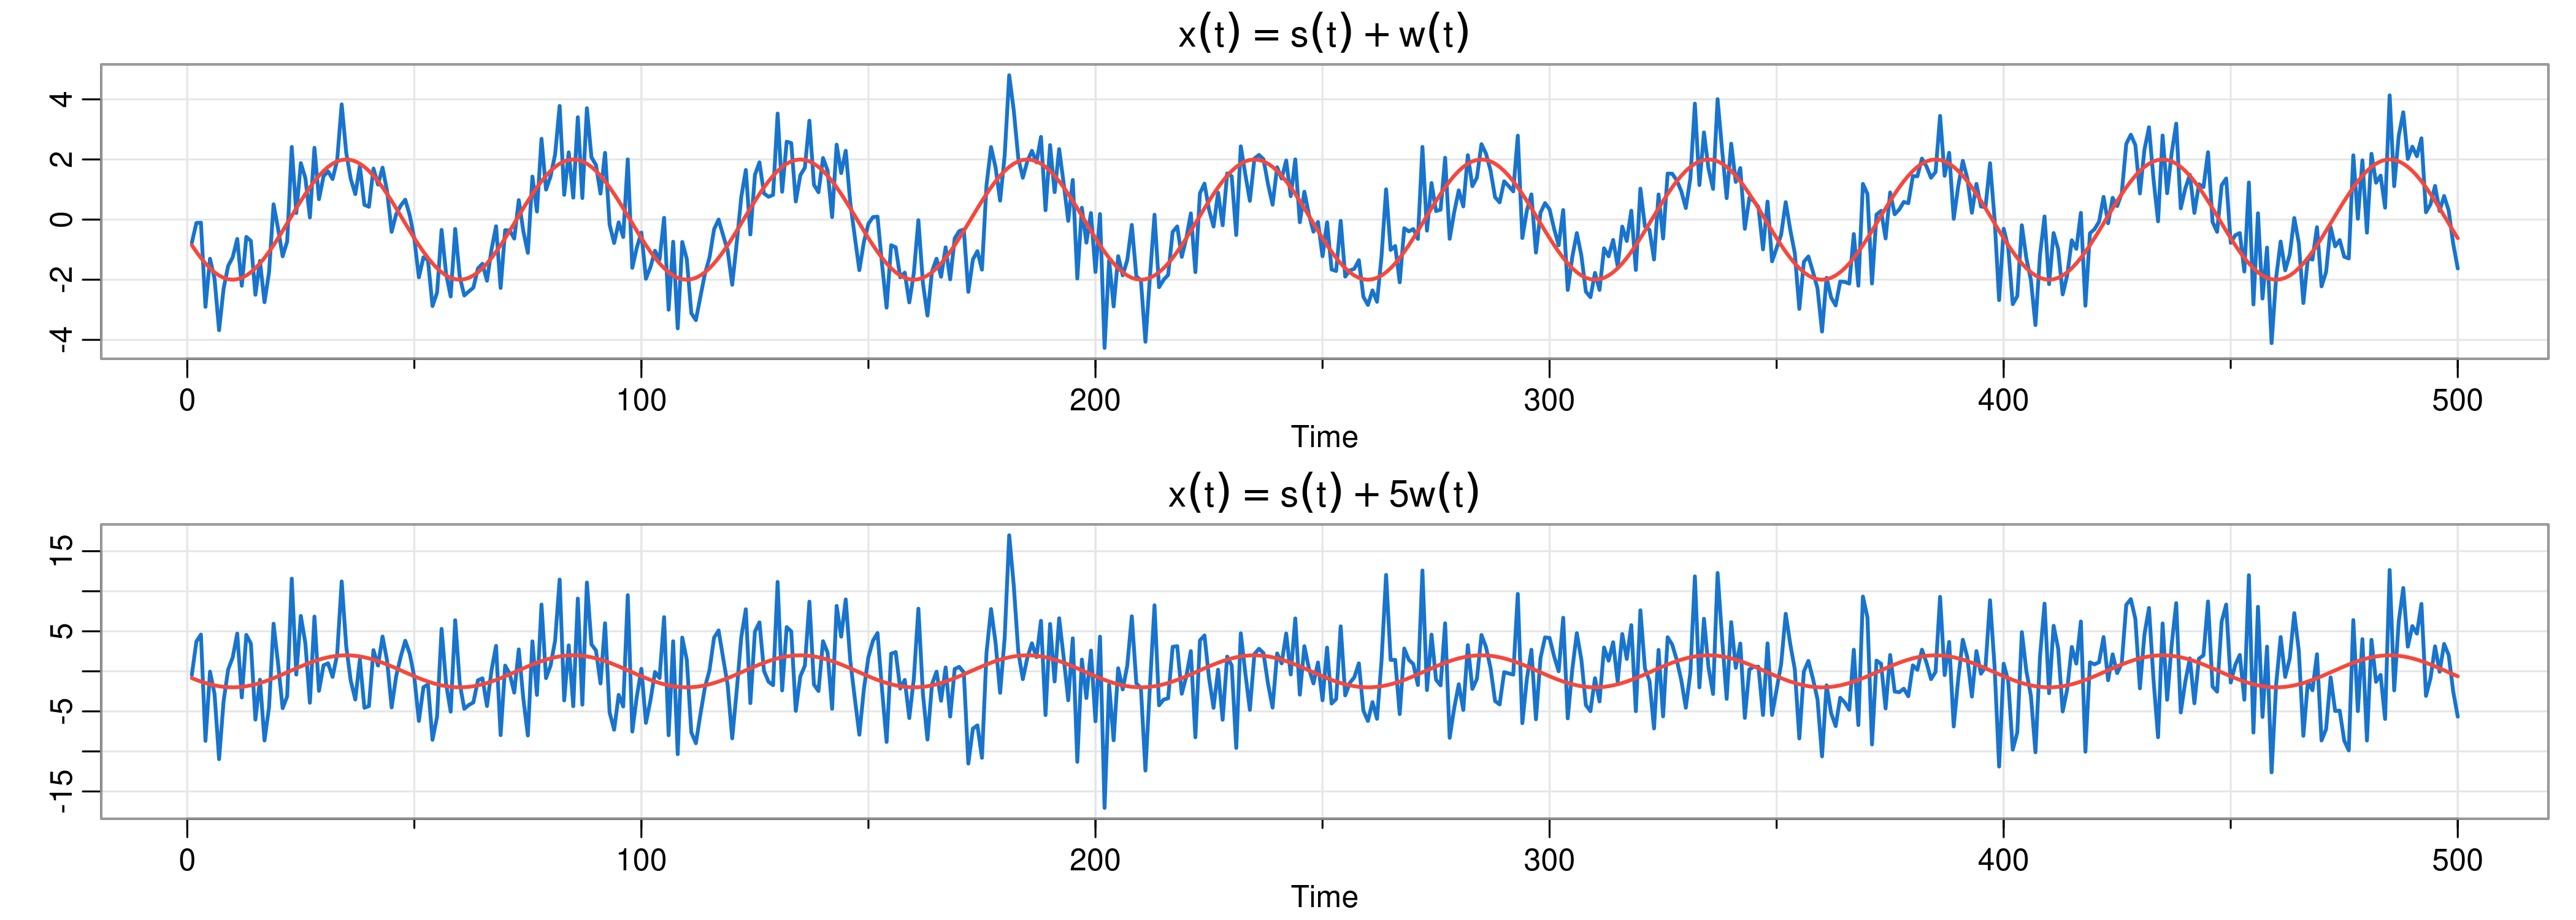

In [13]:
w = rnorm(500,0,1) ## genero ruido blanco

par(mfrow=c(2,1), mar=c(3,2,2,1), cex.main=1.5)   # help(par) for info

#sumamos ruido blanco de varianza 1
tsplot(s + w, ylab="", main = expression(x(t)==s(t)+w(t)), lwd=2, col=4)
lines(s, ylab="", lwd=2, col=2)

tsplot(s + 5*w, ylab="", main = expression(x(t)==s(t)+5*w(t)), lwd=2, col=4)
lines(s, ylab="", lwd=2, col=2)

### Observaciones

En este caso, la varianza del ruido determina cuánto podemos recuperar de la señal original. Se habla de "relación señal a ruido". Cuanto maś potente el ruido, menos podemos recuperar la señal original.

### Ejemplo 6: proceso geométrico

Supongamos que tenemos una magnitud que crece *porcentualmente*. Por ejemplo, en economía, muchas magnitudes crecen un cierto porcentaje de su valor anterior:

$$s_t = (1+\theta)s_{t-1}$$

Por ejemplo, si $\theta=0.05$, crece un $5\%$ por unidad de tiempo.

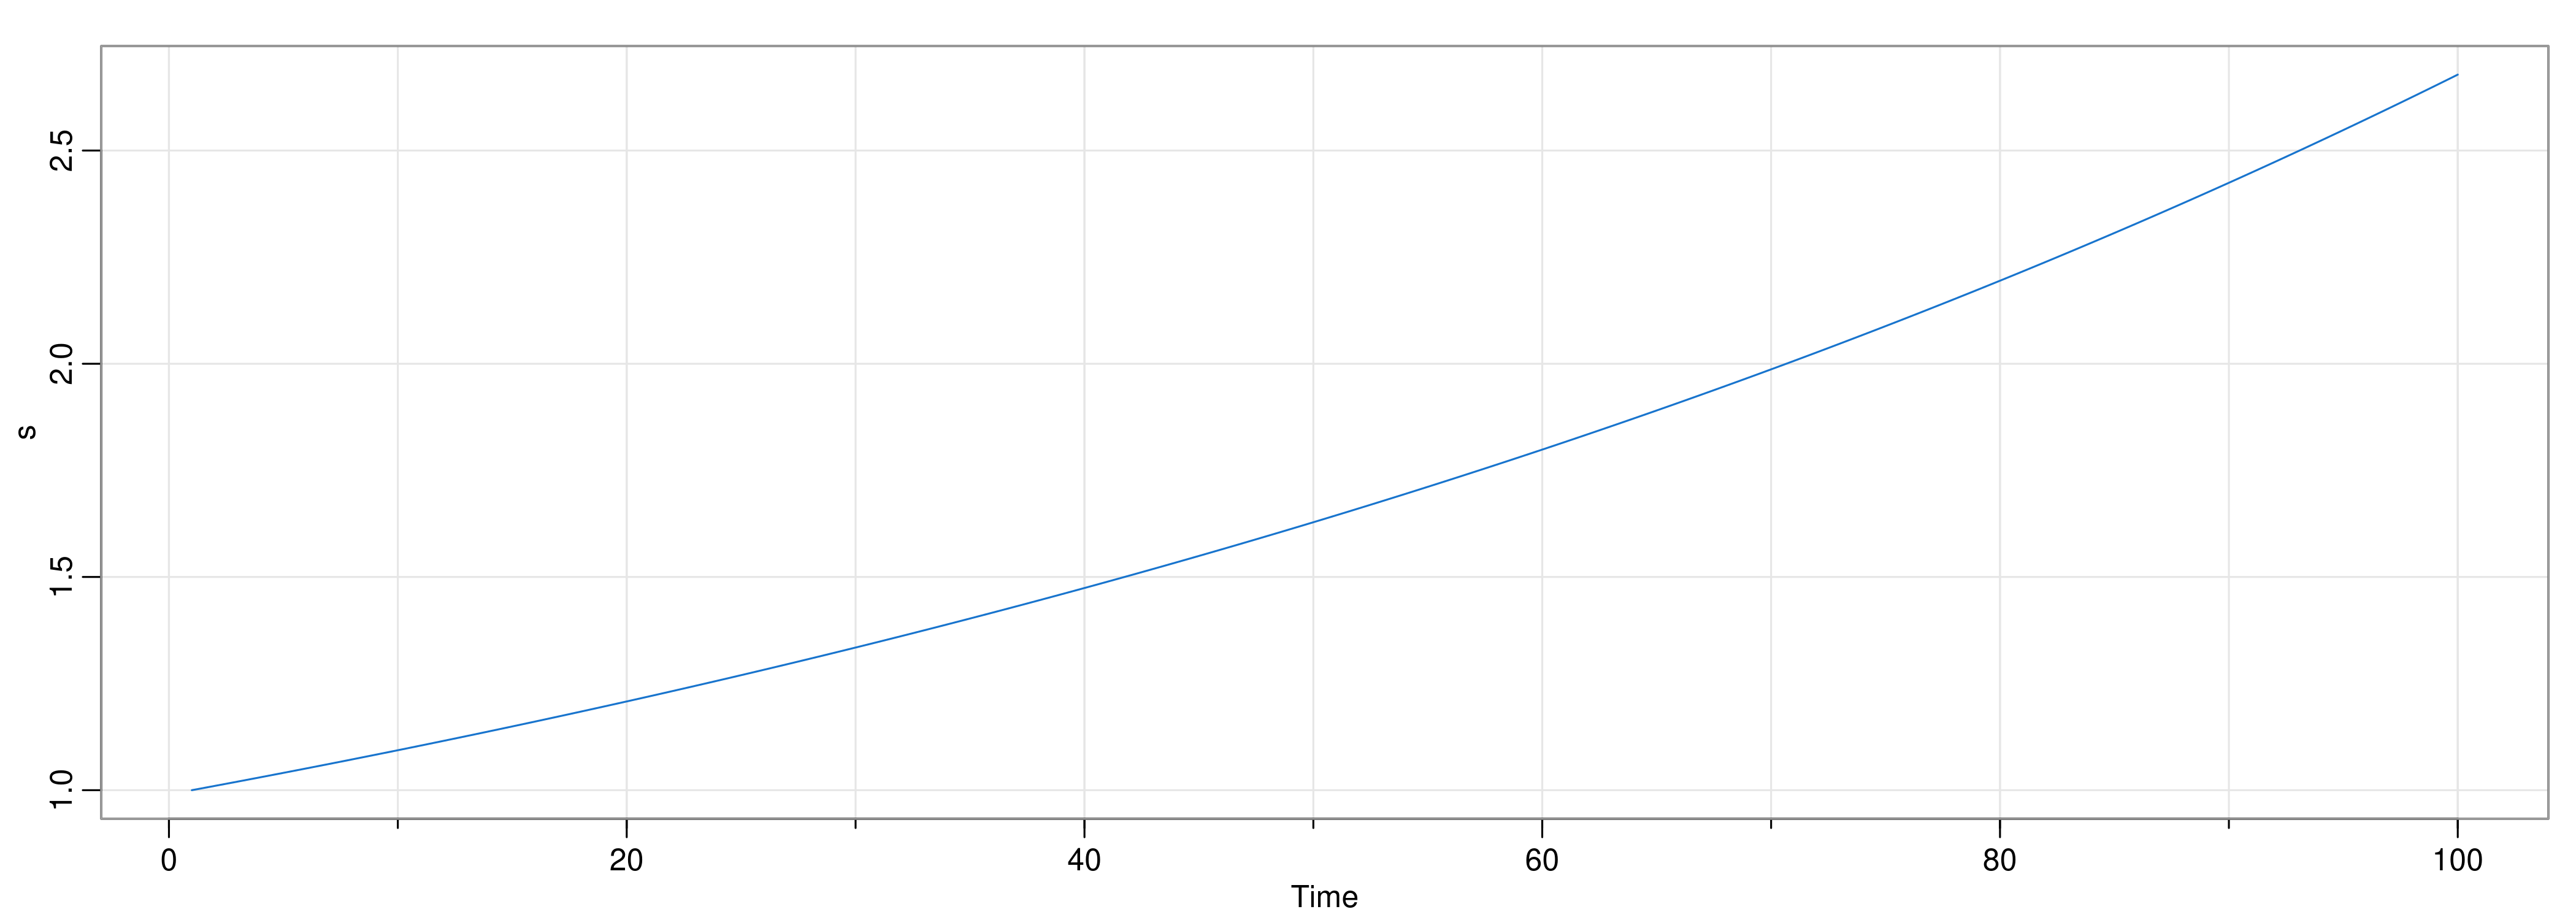

In [14]:
s=1 ##inicializo el primer valor

theta = 0.01

for (i in (2:100)){
    s[i] = (1+theta)*s[i-1]
}

tsplot(s, col=4)

En este caso la transformación $s\mapsto \log(s)$ convierte la tendencia en lineal:

$$s'_t = \log(s_t) = \log((1+\theta)s_{t-1}) = \log(1+\theta) + \log(s_t) = \log(1+\theta) + s'_t.$$ 

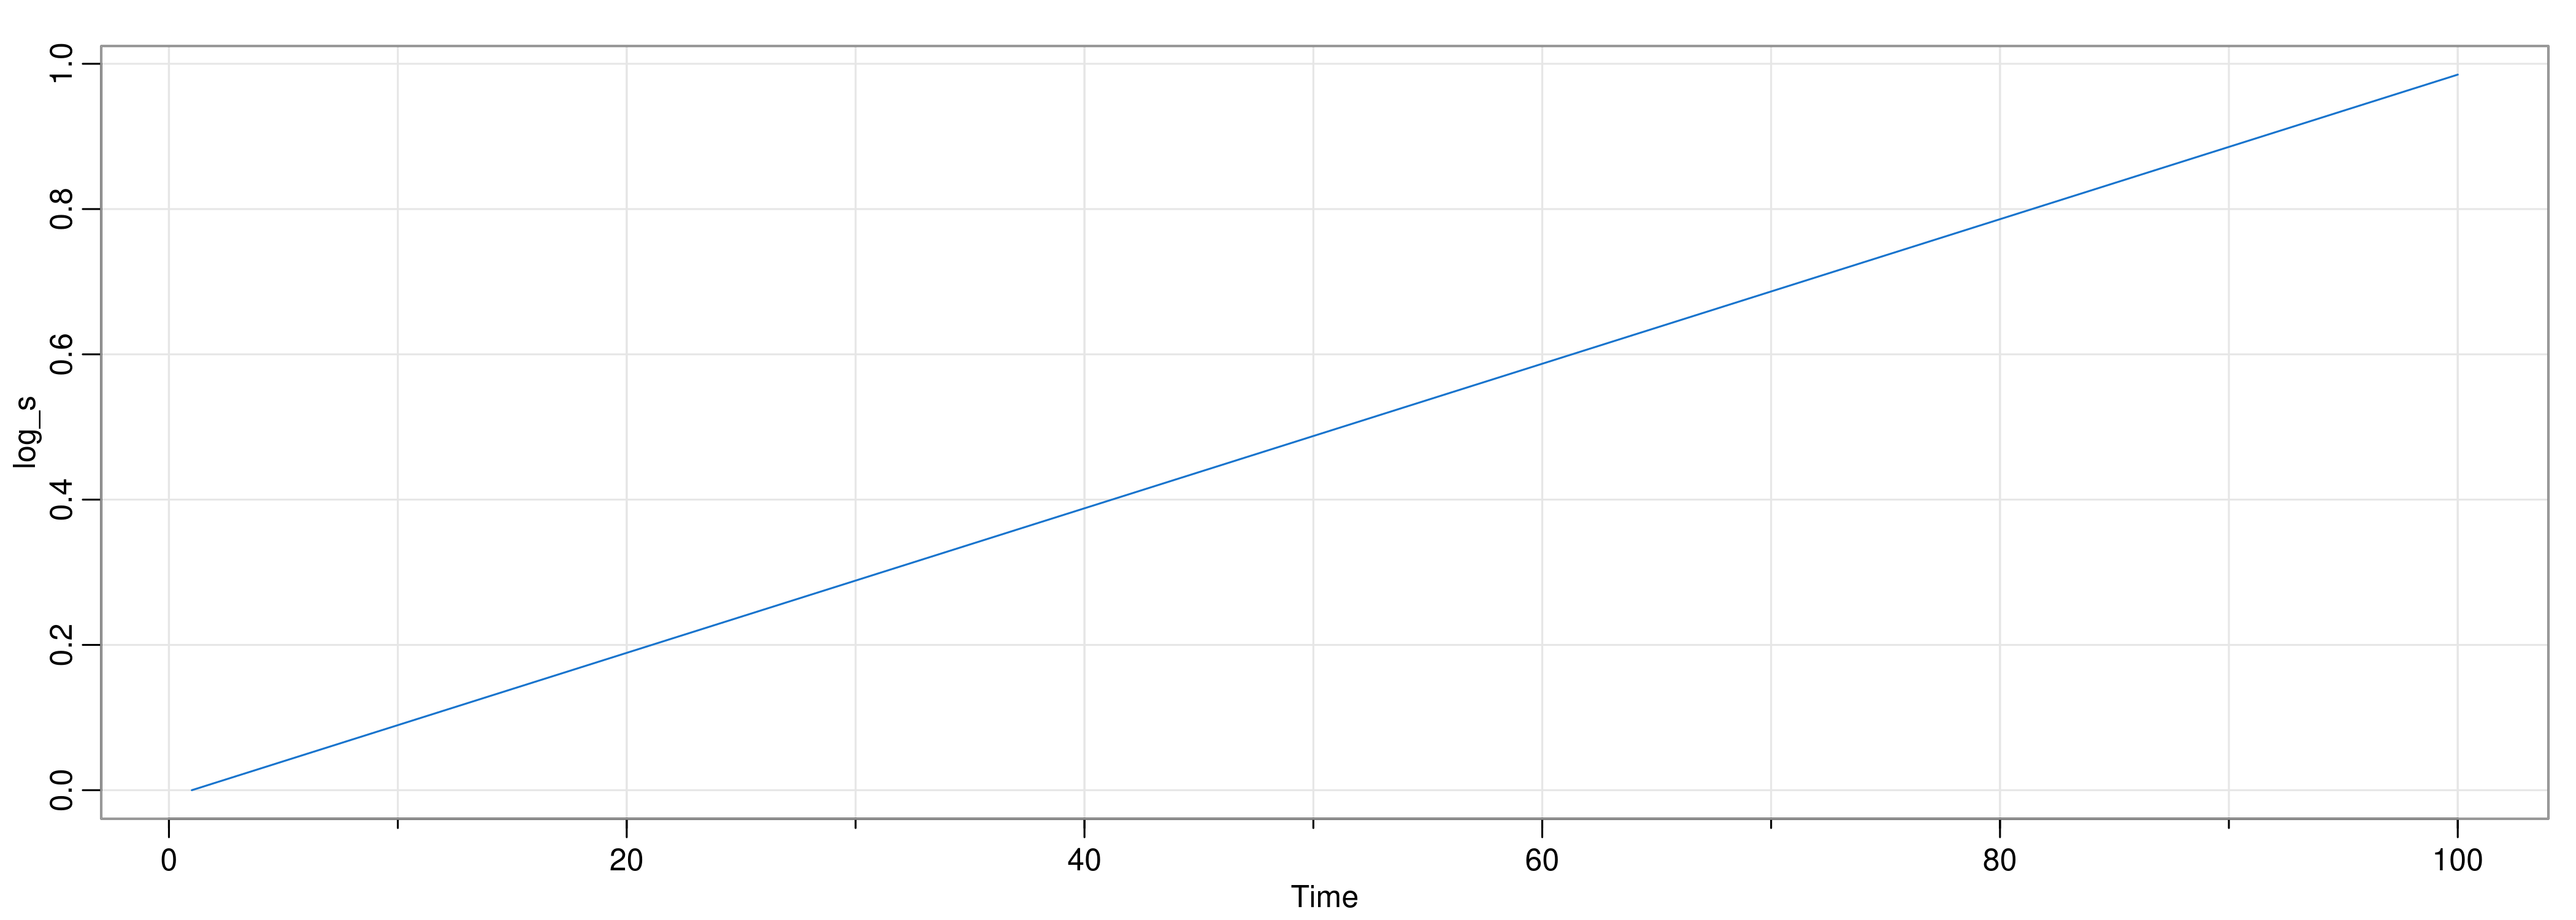

In [15]:
log_s = log(s)
tsplot(log_s, col=4)

Supongamos ahora que podemos asumir que existe ruido en el incremento, es decir:

$$x'_t = \log(x_t) = \log(1+\theta) + x'_{t-1} + w_t.$$

con $w_t$ ruido blanco Gaussiano. ¿Cómo se ve este proceso? ¿Cómo se ve el proceso original?

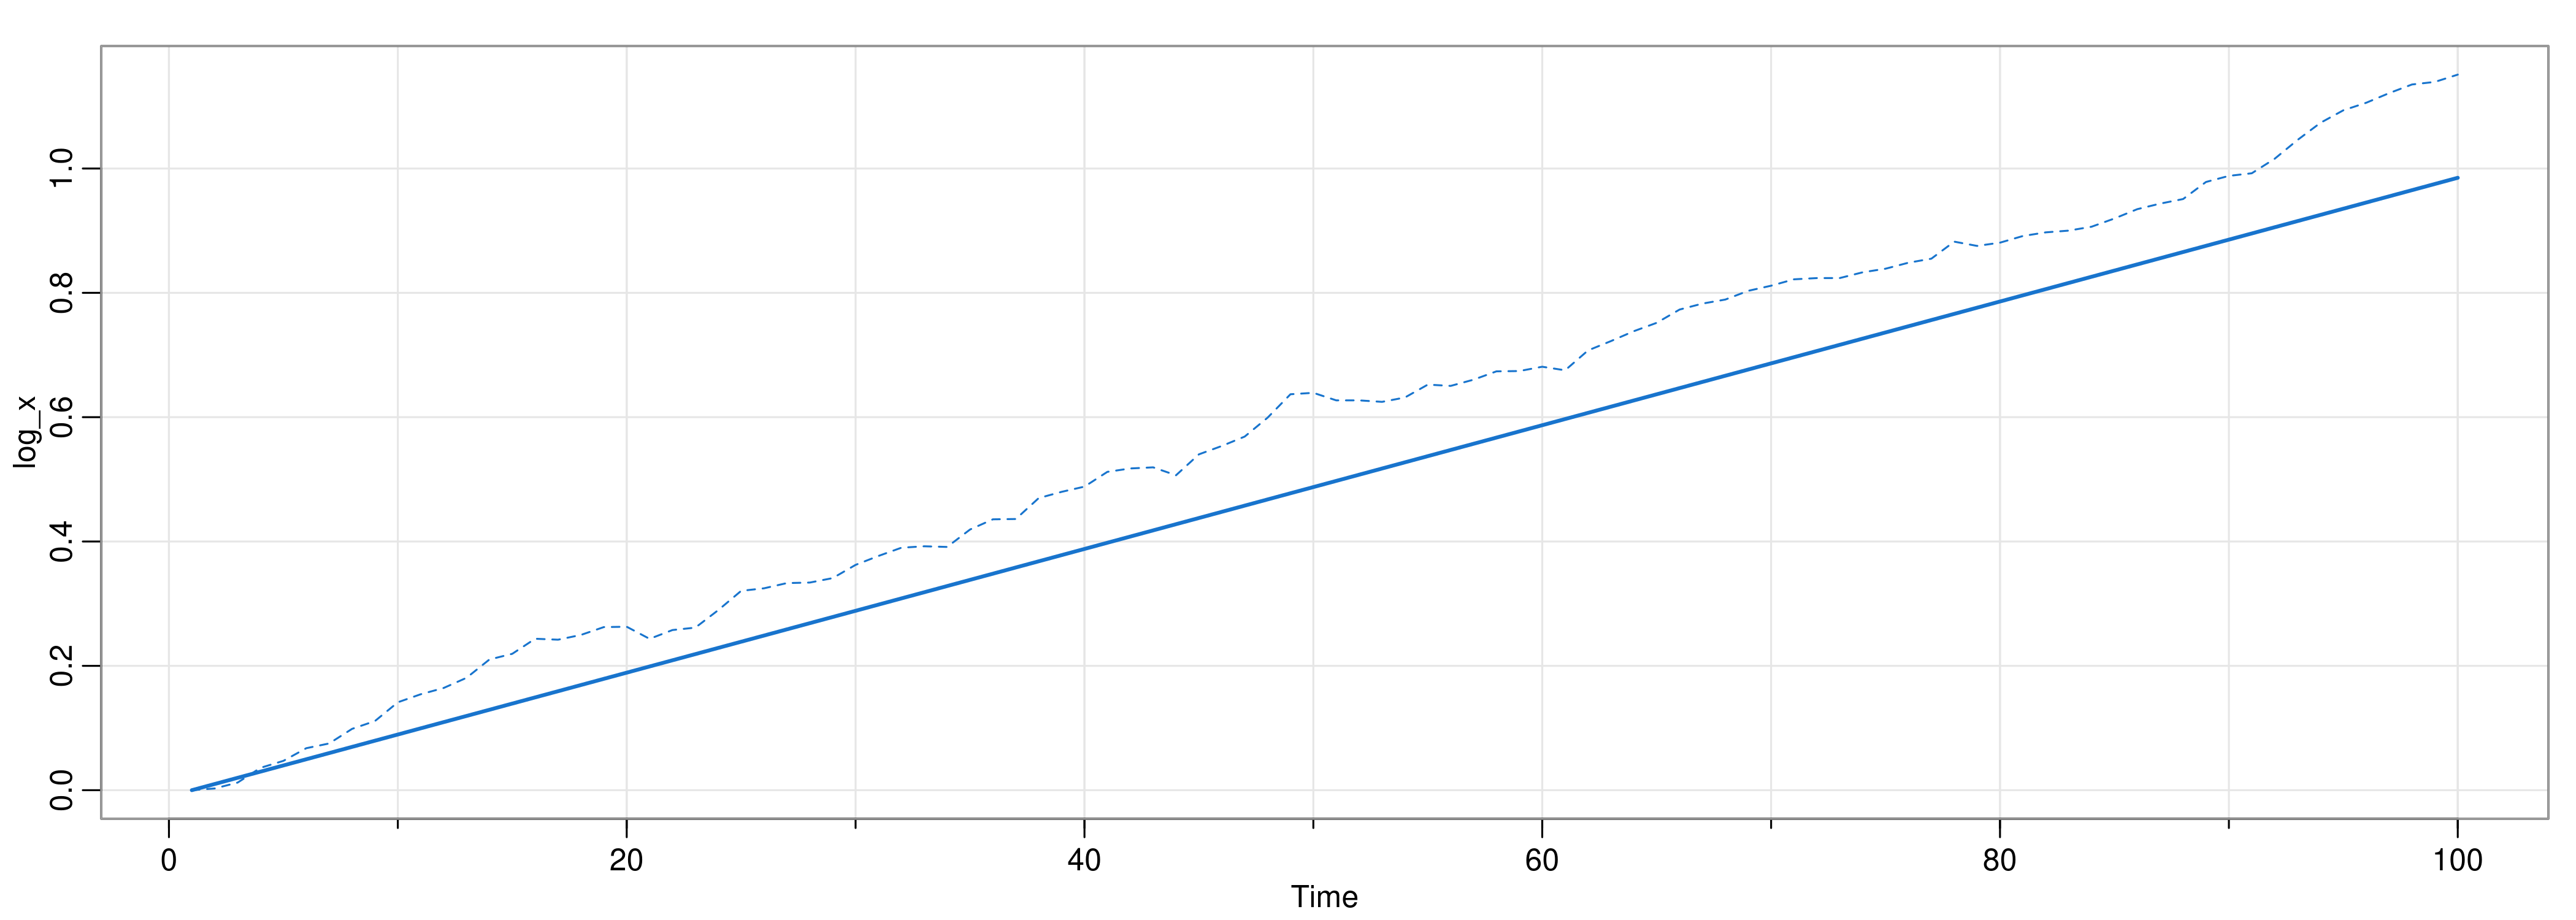

In [16]:
w=rnorm(100,0,1)
log_x = log_s[1] + 0.01*w[1]

for (i in (2:100)){
    log_s[i] = log(1+theta) + log_s[i-1]
    log_x[i] = log(1+theta)  + log_x[i-1] + 0.01*w[i]
}

tsplot(log_x, col=4, lty=2)
lines(log_s, col=4, lwd=2)

El proceso en la escala original se recupera haciendo la transformación inversa al logaritmo, es decir, la exponencial.

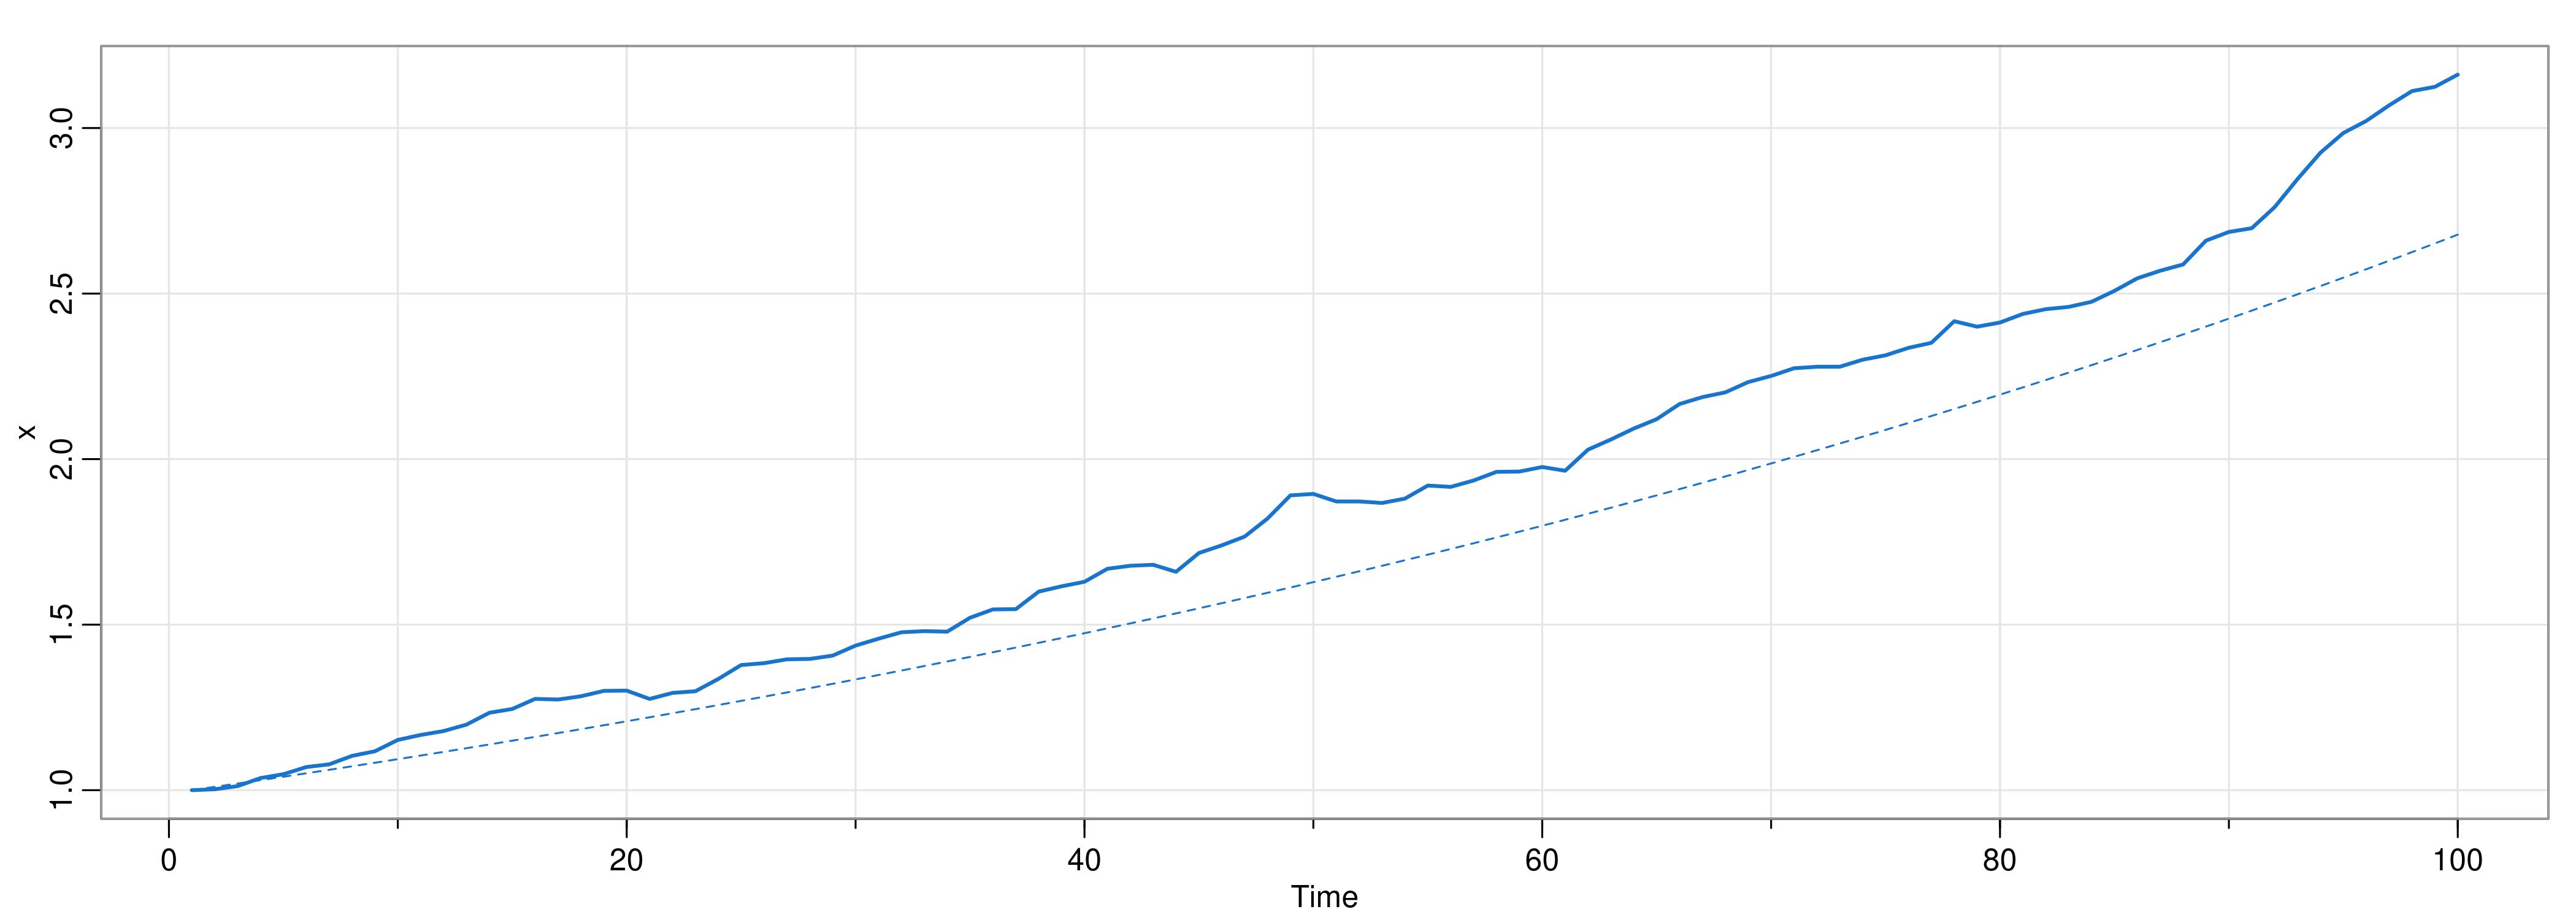

In [17]:
x = exp(log_x)

tsplot(x,col=4,lwd=2)
lines(s,col=4,lty=2)

## Ejercicio

Considere un modelo de señal más ruido de la forma general $x_t = s_t + w_t$ con $w_t$
ruido blanco Gaussiano de varianza $\sigma_w^2=1$. Simular y graficar $n=200$ observaciones de cada uno de los siguientes modelos:

  * $x_t = s_t + w_t$ para $t = 1, \ldots, 200$ y:
  
    $$s_t = \left\{ \begin{array}{ll}
                0 & t=1,\ldots,100, \\
                10e^{-\frac{t-100}{20}}\cos(2\pi t/4) & t=101,\ldots,200.
            \end{array} \right.$$

Sugerencia: se puede generar la señal con:

`s = c(rep(0,100), 10*exp(-(1:100)/20)*cos(2*pi*1:100/4))`

 * $x_t = s_t + w_t$ para $t = 1, \ldots, 200$ y:
    
   $$s_t = \left\{ \begin{array}{ll}
                0 & t=1,\ldots,100, \\
                10e^{-\frac{t-100}{200}}\cos(2\pi t/4) & t=101,\ldots,200.
            \end{array} \right.$$
            
Comparar la apariencia general de las series de ambos modelos con las de terremoto y explosión analizadas antes. Graficar además los moduladores de la señal $e^{-t/20}$ y $e^{-t/200}$ en cada caso.

## Ejercicio

1. Generar $n = 100$ observaciones del proceso autorregresivo:

$$x_t = −.9x_{t−2} + w_t.$$

con $\sigma^2_w =1$, usando el método visto en este cuaderno. A continuación, aplique el siguiente filtro de media móvil a la serie $x$:

$$v_t = \frac{1}{4}(x_t + x_{t−1} + x_{t−2} + x_{t−3}).$$

Grafique conjuntamente $x_t$ y $v_t$. Comente el comportamiento de $x$ y $v$ y qué ocurre al aplicar el filtro.


2. Repetir la parte anterior pero con la señal $x_t=\cos(2\pi t/4)$

3. Repetir la parte 2. pero agregando ruido blanco gaussiano de varianza $1$.

4. Hacer lo mismo para el logaritmo de la serie `jj` de ganancias de Johnson & Johnson.

5. Discuta los resultados. ¿Qué logra el filtro de media móvil? ¿Cómo lo aplicaría a los datos de Covid-19?